# <center>        **Introduction to Data Science (S1-22_DSECLZG532)-ASSIGNMENT**</center>

## Group No

## Group Member Names:
1. 

# 1. Business Understanding
 
Students are expected to identify a data analytics task of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

--------------Type the answers below this line-------------- 
#### What is the business problem that you are trying to solve?
ANS:  Predicting Hepatitis C illness. The target attribute for classification is Class (Category has 4 attrbutes and we grouped them to blood donors vs. Hepatitis C).

#### What data do you need to answer the above problem?
ANS: A Dataset D which has N features explain various protein levels in the human affected by Hepatitis and Blood donors
A dataset D is composition of instances J = {Jk | 1 ≤ k< m}, where m
is the total number of subjects (cases) and feature set X = {Xi | 1 ≤ i < n}, where n is
the number of features

#### What are the different sources of data?
ANS: https://archive.ics.uci.edu/ml/datasets/HCV+data (hcvdat0.csv)

#### What kind of analytics task are you performing?
ANS: ML methods such as classification approaches used to predict hepatitis disease.
ML Techniques used where
   Logistic Regression,  Decision Tree, KNN
Best attributes are selected using CHI2 feature selection

In [1]:
# needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Metrics
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = (10,8)

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [4]:
##---------Type the code below this line------------------##
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

## 2.2 Code for converting the above downloaded data into a dataframe

In [6]:
##---------Type the code below this line------------------##
#  Already done as a part of previous step itself

## 2.3 Confirm the data has been downloaded correctly by displaying the first 5 and last 5 records.

In [7]:
##---------Type the code below this line------------------##
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [9]:
##---------Type the code below this line------------------##
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [10]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [12]:
df.size

8610

In [13]:
df.shape

(615, 14)

In [14]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [15]:
for col in df.columns:
  print(df[col].value_counts(sort=True))
  print('\n\n')

1      1
414    1
407    1
408    1
409    1
      ..
207    1
208    1
209    1
210    1
615    1
Name: Unnamed: 0, Length: 615, dtype: int64



0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64



46    32
48    28
33    25
51    24
52    22
50    21
49    21
35    21
38    20
53    20
37    20
43    20
44    20
47    20
56    20
45    19
34    19
59    18
32    17
57    16
36    16
41    16
39    15
40    14
55    14
42    13
54    12
60    12
58    10
61     9
64     9
62     8
65     8
63     6
68     4
66     4
67     3
70     3
71     3
76     2
74     2
29     2
77     1
19     1
23     1
25     1
27     1
30     1
75     1
Name: Age, dtype: int64



m    377
f    238
Name: Sex, dtype: int64



39.0    14
41.0    12
44.7    12
39.9    12
46.4    11
        ..
50.3     1
37.6     1
50.8     1
45.8     1
24.0     1
Name: ALB, Length: 189, dtype: int64



#### Lets go and see the percentage of missing values

In [16]:
round(df.isnull().mean().sort_values(ascending = False),2) *100

ALP           3.0
CHOL          2.0
ALB           0.0
ALT           0.0
PROT          0.0
Unnamed: 0    0.0
Category      0.0
Age           0.0
Sex           0.0
AST           0.0
BIL           0.0
CHE           0.0
CREA          0.0
GGT           0.0
dtype: float64

## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

#### Size of the dataset?


> (615 rows, 13 features)



In [17]:
df.drop(columns='Unnamed: 0', inplace=True)

In [18]:
df.shape

(615, 13)

#### What type of data attributes are there?

In [19]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [20]:
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.
1) X (Patient ID/No.)
2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3) Age (in years)
4) Sex (f,m)
5) ALB
6) ALP
7) ALT
8) AST
9) BIL
10) CHE
11) CHOL
12) CREA
13) GGT
14) PROT

**This data has null values, outliers etc that has to be cleaned and also numeric attributes has to be standardized**

#### Frequency Distribution Table using the Age Range

In [21]:
df.groupby(['Age','Sex']).size()

Age  Sex
19   m      1
23   m      1
25   m      1
27   m      1
29   m      2
           ..
71   m      3
74   m      2
75   f      1
76   m      2
77   m      1
Length: 85, dtype: int64

In [22]:
df['Age'].max()

77

In [23]:
df['Age'].min()

19

In [24]:
#df['Category'].isin(options)] 
donoroptions=['0s=suspect Blood Donor','0=Blood Donor']
patientoptions=['3=Cirrhosis','1=Hepatitis','2=Fibrosis']
patients=df.loc[df['Category'].isin(patientoptions)]
donor=df.loc[df['Category'].isin(donoroptions)]

In [25]:
patients.shape

(75, 13)

In [26]:
donor.shape

(540, 13)

#### Understanding data usings bins

In [27]:

labels = ["Less than 20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,20,30,40,50,60,70,80]
freq_df = patients.groupby(pd.cut(patients['Age'],bins=bins,labels=labels)).size()

In [28]:
freq_df

Age
Less than 20     1
20-30            6
30-40           13
40-50           21
50-60           23
60-70            8
70 and more      3
dtype: int64

In [29]:
# Naming the pd series with Count value
freq_df.name='Count'

In [30]:
freq_df

Age
Less than 20     1
20-30            6
30-40           13
40-50           21
50-60           23
60-70            8
70 and more      3
Name: Count, dtype: int64

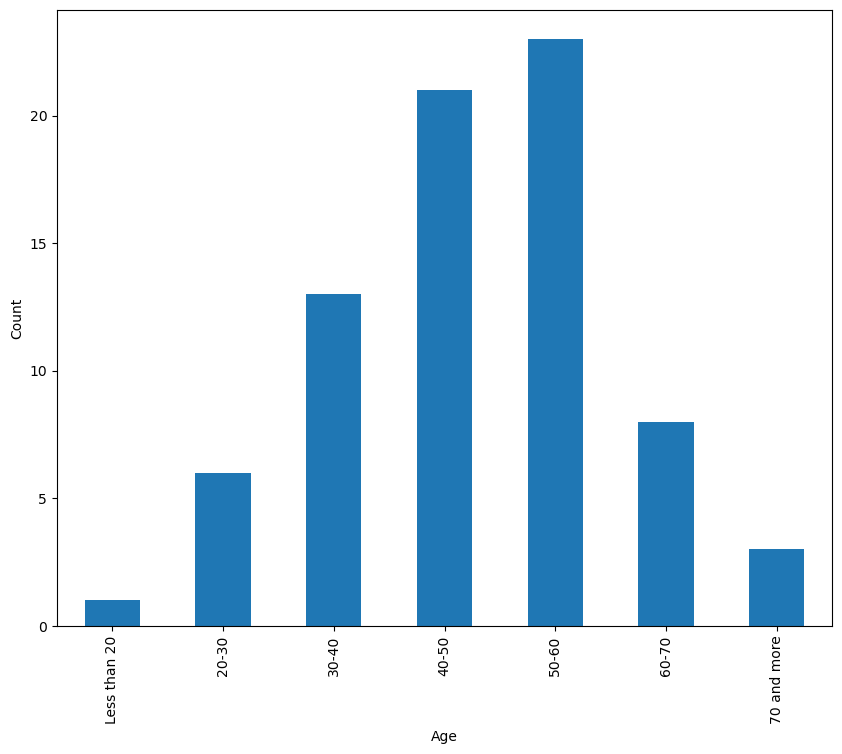

In [31]:
freq_df.plot(kind='bar')
plt.ylabel('Count')
plt.show()

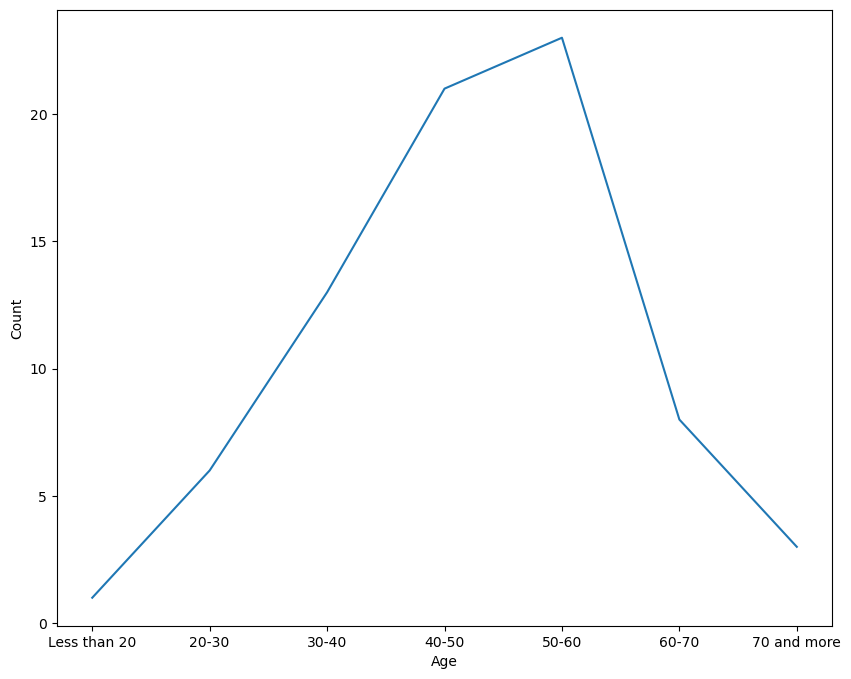

In [32]:
freq_df.plot(kind='line')
plt.ylabel('Count')
plt.show()

In [33]:
freq_df

Age
Less than 20     1
20-30            6
30-40           13
40-50           21
50-60           23
60-70            8
70 and more      3
Name: Count, dtype: int64

<Figure size 1300x1200 with 0 Axes>

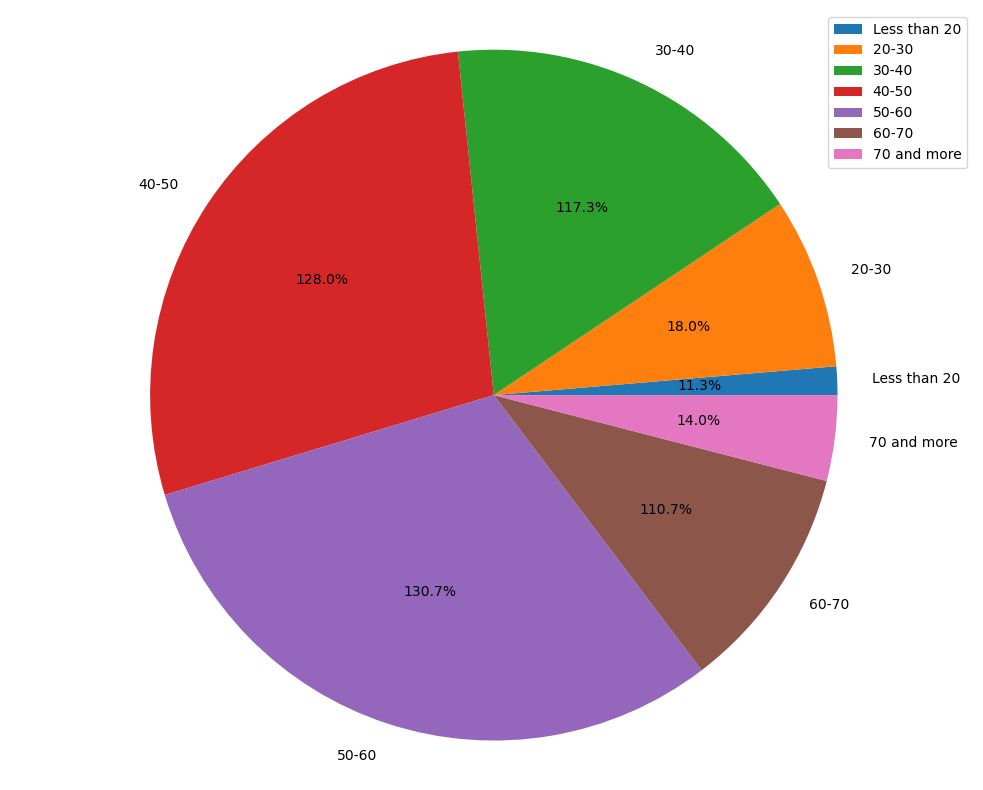

In [34]:
plt.figure(figsize=(13,12))
labels = freq_df.index
fig1,ax1 = plt.subplots()
ax1.pie(freq_df,labels=labels,autopct='1%.1f%%')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')
ax1.axis('equal')
plt.tight_layout()
plt.show()

# 3. Data Preparation

If input data is numerical or categorical, do 3.1, 3.2 and 3.4
If input data is text, do 3.3 and 3.4

#### Duplicate Check

In [35]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
610    False
611    False
612    False
613    False
614    False
Length: 615, dtype: bool

In [36]:
df.duplicated().sum()

0

#### NULL Check

In [37]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [38]:
df.shape

(615, 13)

In [39]:
(df.isnull().sum() > 0).values

array([False, False, False,  True,  True,  True, False, False, False,
        True, False, False,  True])

In [40]:
null_present_columns = df.columns[df.isna().any()].tolist()

In [41]:
null_present_columns

['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']

### To Identify if null values can be replaced by median

#### If variance before and after replacement is different, median might not be the apropriate imputation strategy

In [42]:
#Writing function to fill the missing data
def impute_nan(df,variable):
    median=df[variable].median()
    df[variable+"_median"]=df[variable].fillna(median)

In [43]:
for column in null_present_columns:
    impute_nan(df, column)

In [44]:
median_present_columns=[]
for column in null_present_columns:
    median_present_columns.append(column+"_median")

### As we can see, there are minor difference in the standard deviation of original and median columns. Difference in median imputed columns is minimal.


In [45]:
for column in null_present_columns:
    print(f'Std of {column} has {round(df[column].std(),2)} and std of {column+"_median"} is  {round(df[column+"_median"].std(),2)}')

Std of ALB has 5.78 and std of ALB_median is  5.78
Std of ALP has 26.03 and std of ALP_median is  25.65
Std of ALT has 25.47 and std of ALT_median is  25.45
Std of CHOL has 1.13 and std of CHOL_median is  1.12
Std of PROT has 5.4 and std of PROT_median is  5.4


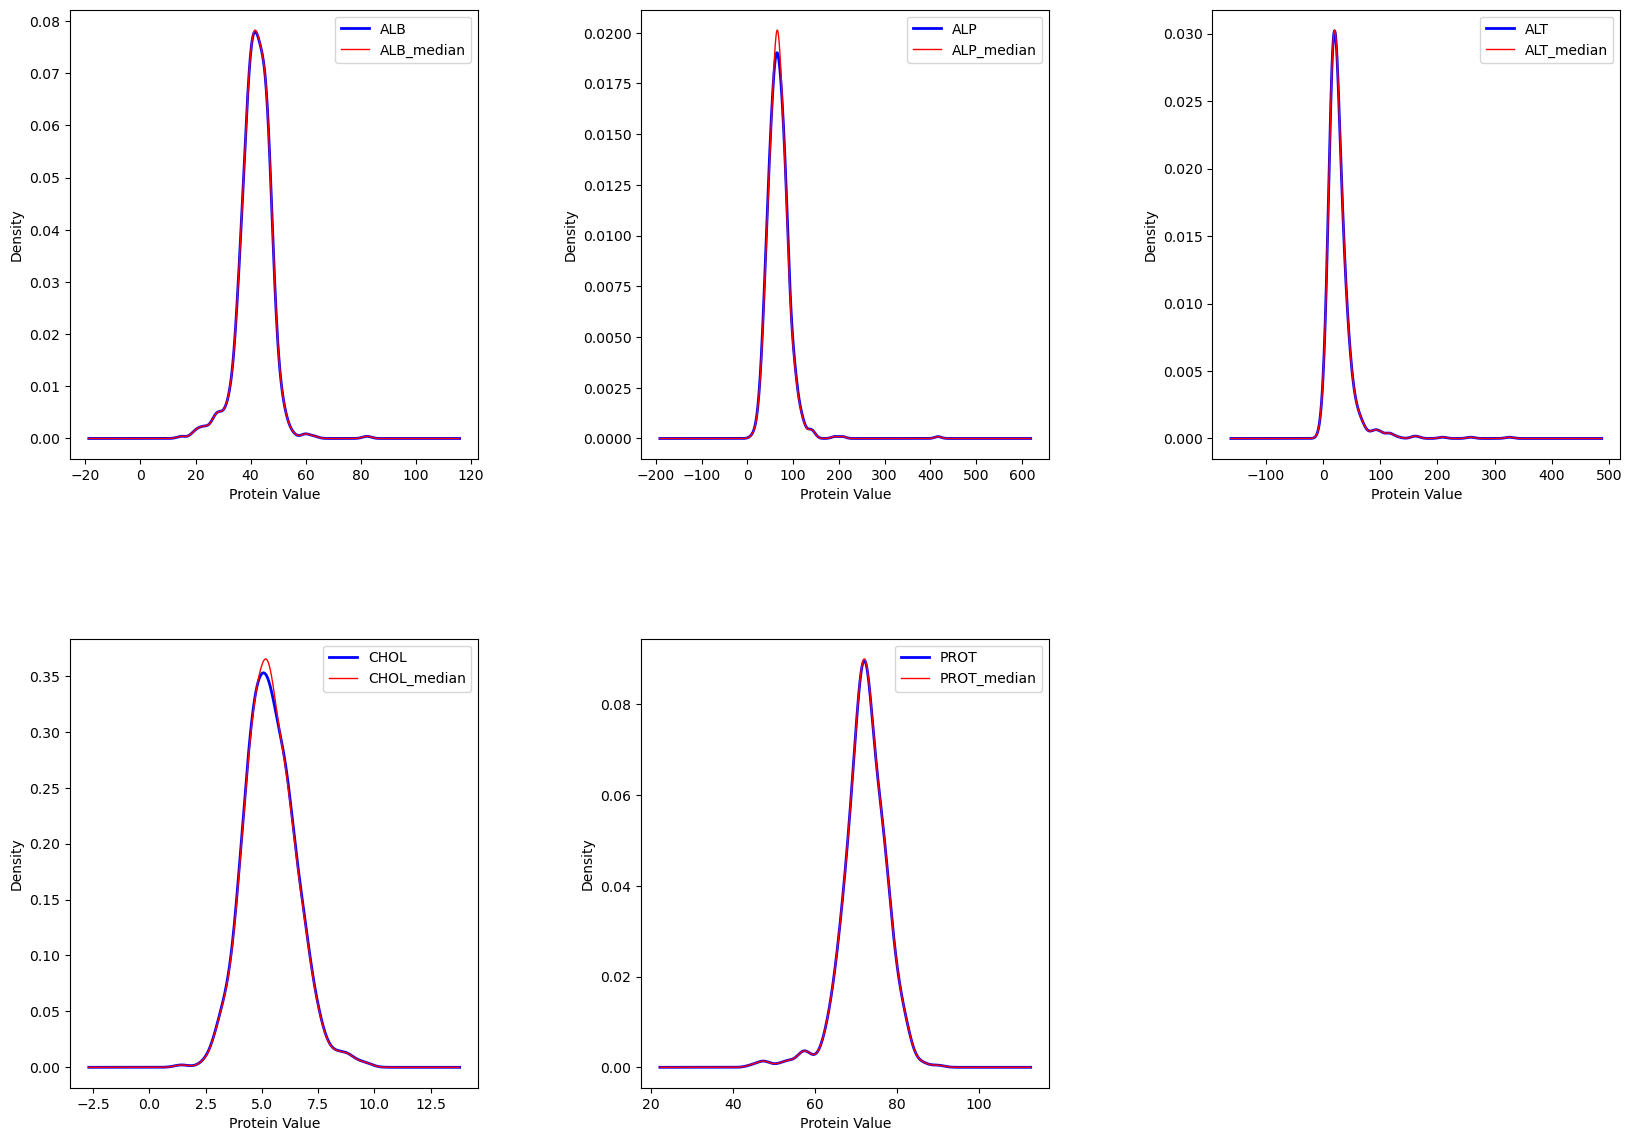

In [46]:
# Checking the difference between original and imputed fearure with the help of graph
fig = plt.figure(figsize=(20, 14)) 
fig.subplots_adjust(hspace=0.4, wspace=0.4)
index=0
for column in null_present_columns:
    ax = fig.add_subplot(2, 3, index+1)
    df[column].plot(kind='kde', ax=ax, color='blue', linewidth=2)
    df[column+"_median"].plot(kind='kde', ax=ax, color='red', linewidth=1)
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    plt.xlabel('Protein Value')
    index+=1

From this we could conclude that median imputation didn't change the distribution, i.e no new skewness was observed, standard dev of original and imputed data are similar.

Outlier Treatment is done with median imputation.

In [47]:
#remove median columns as they were for comparing only
for column in null_present_columns:
    df.drop(columns = {column+"_median":column}, inplace = True)


In [48]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [49]:
numerical_columns=df.select_dtypes('number').columns
numerical_columns

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'],
      dtype='object')

In [50]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()

<AxesSubplot:xlabel='count', ylabel='Category'>

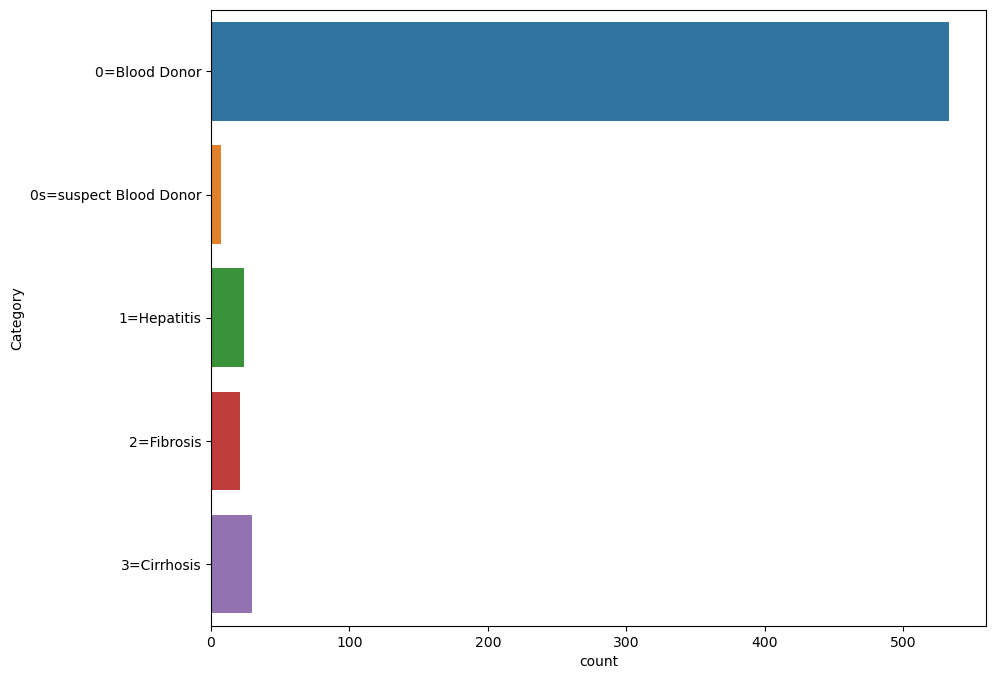

In [51]:
sns.countplot(data=df, y="Category")

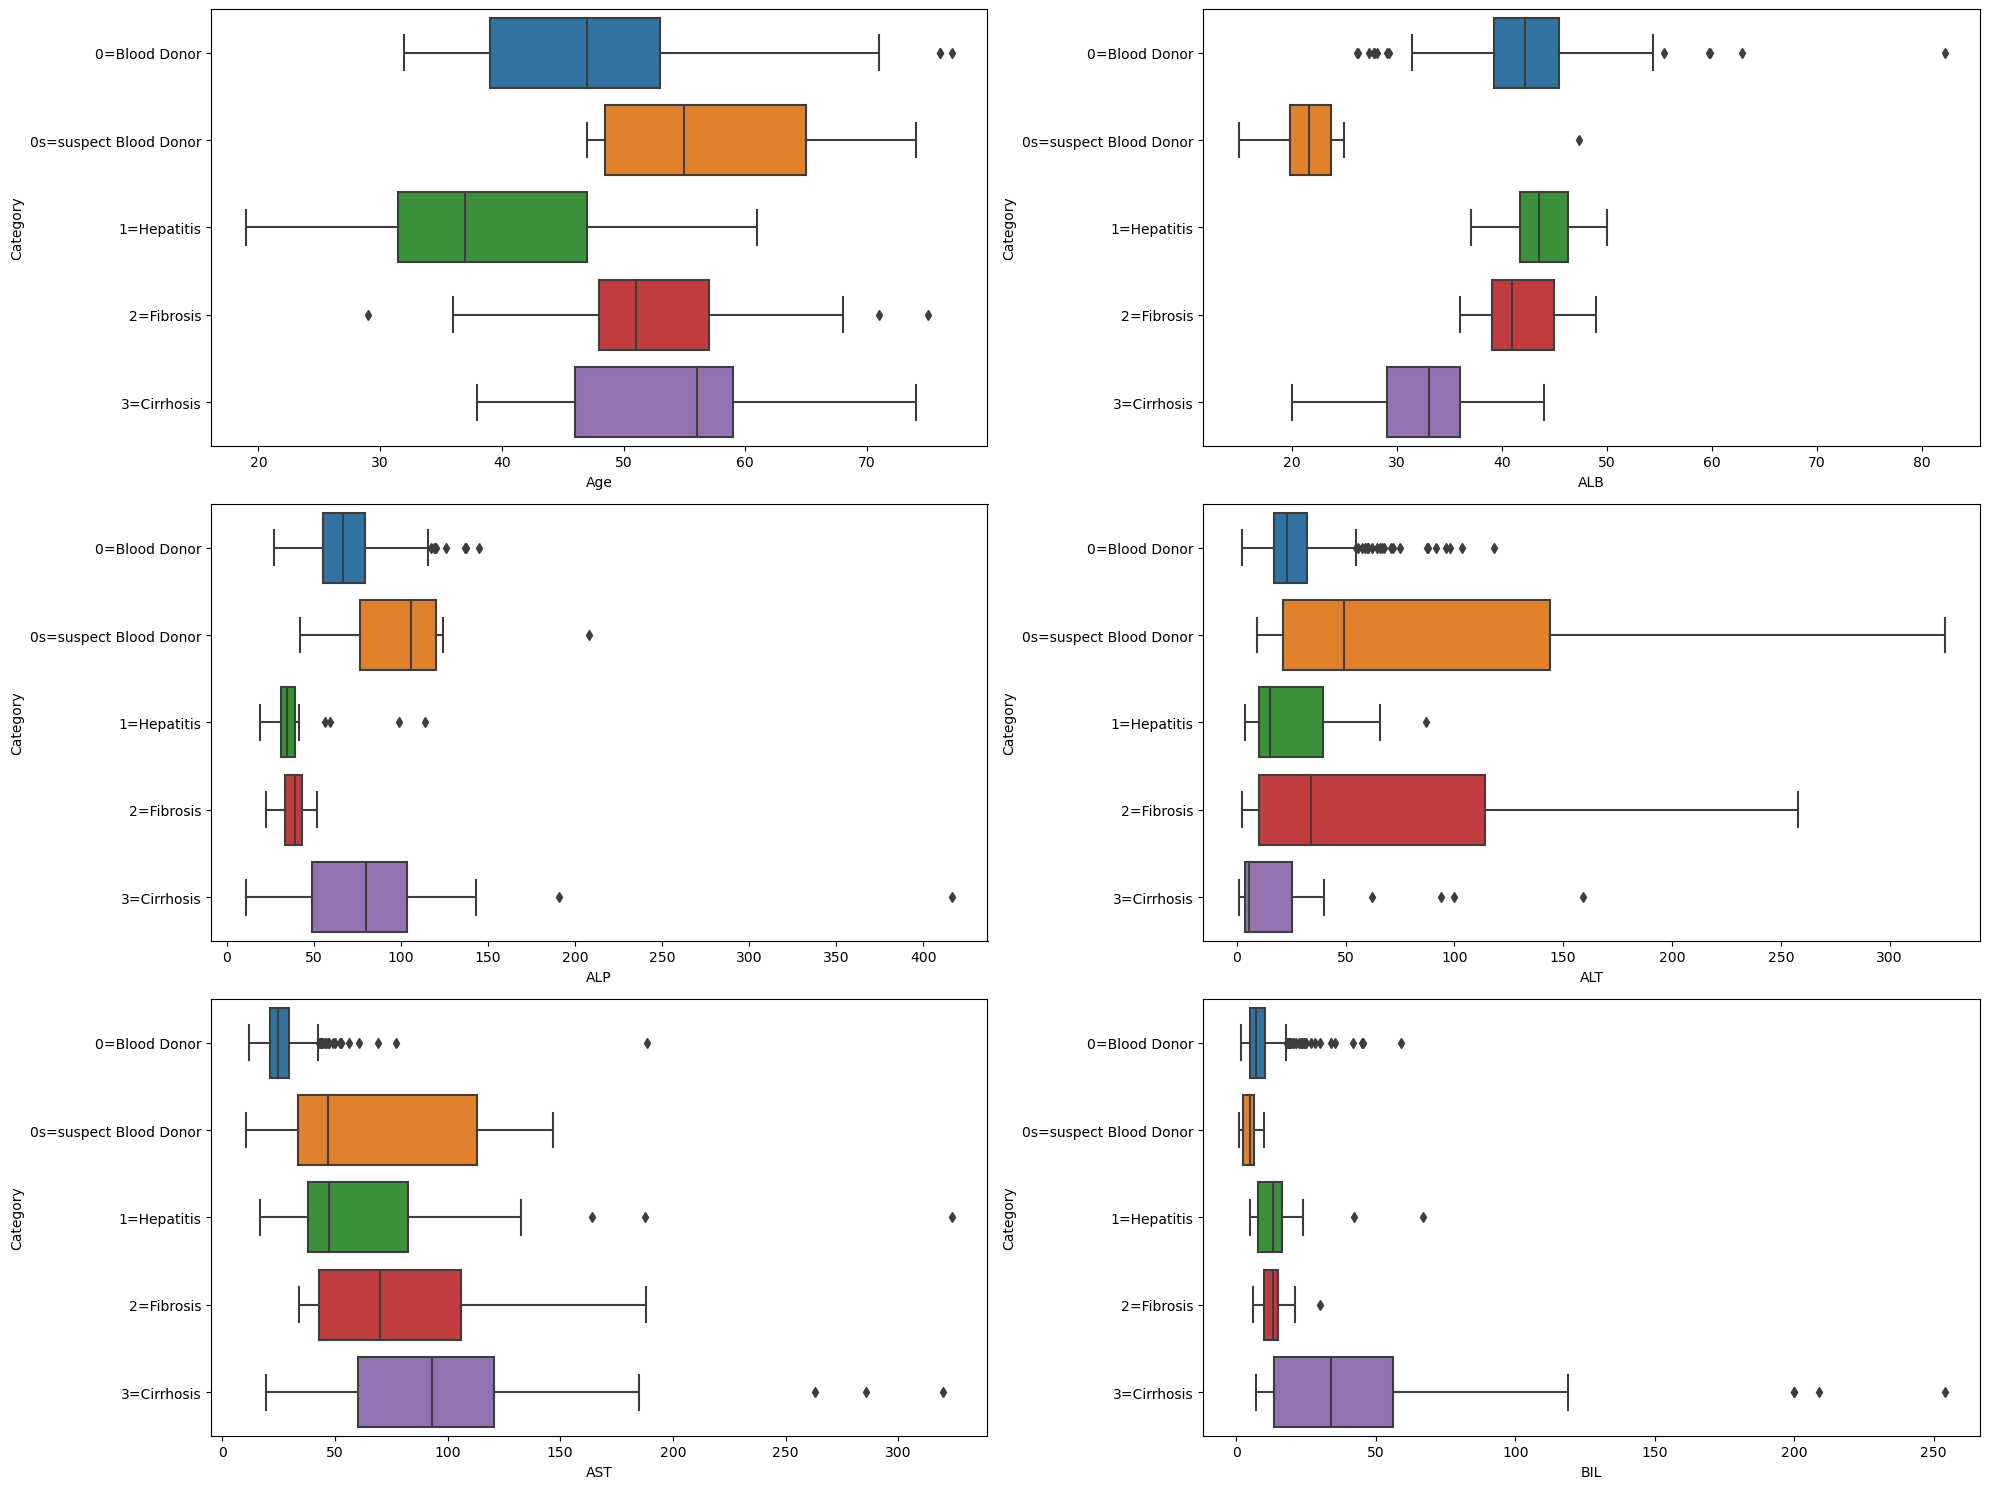

In [52]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for var, subplot in zip(numerical_columns, ax.flatten()):
    sns.boxplot(x=var, y='Category', data=df, ax=subplot)
    plt.tight_layout()

# 3. Data Outliers

In [53]:
cleaned_df = df.copy(deep=True)
for col in numerical_columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  cleaned_df[col] = df[~((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))][col]



In [54]:
# Remove Outliers using IQR
# cleaned_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [55]:
# set_indices = []
# for col in numerical_columns:
#   q1 = df[col].quantile(0.25)
#   q3 = df[col].quantile(0.75)
#   iqr = q3-q1
#   # print(df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))].index)
#   set_indices.extend(df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))].index.values)

# len(set(set_indices))

In [56]:
df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))].index.values

array([ 27,  59, 287, 312, 315, 483, 509, 527, 533, 534, 535, 537, 538,
       539, 545, 563, 586, 597, 604, 606], dtype=int64)

In [57]:
cleaned_df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32.0,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32.0,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32.0,m,46.9,74.7,36.2,NaN,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32.0,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32.0,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


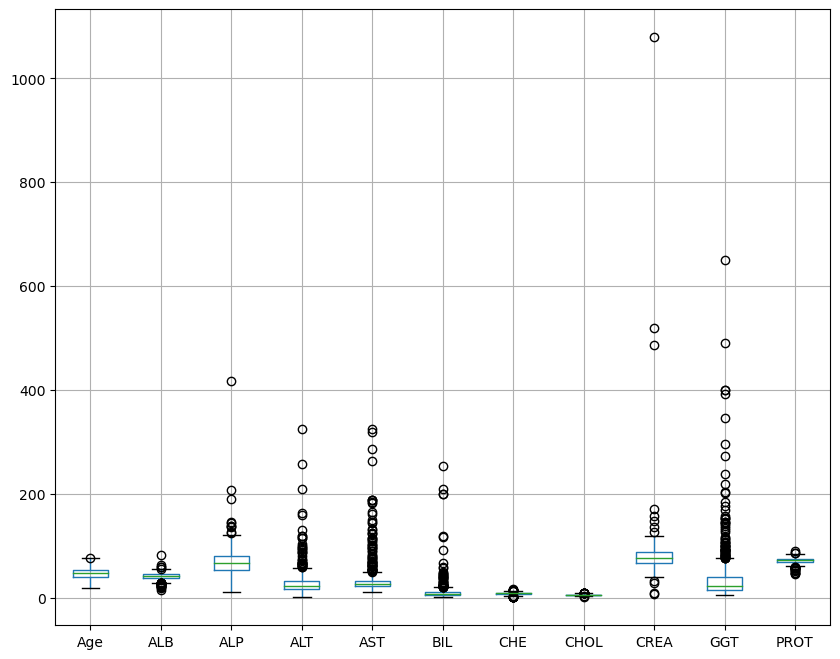

In [58]:
df.boxplot()
plt.show()

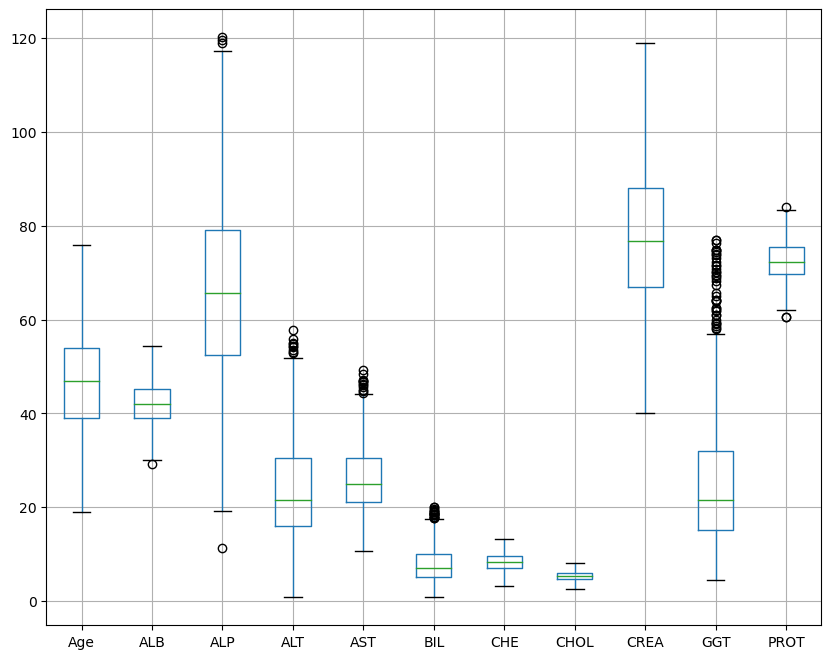

In [59]:
cleaned_df.boxplot()
plt.show()


Even after IQR treatment we see some outlier values in our dataset. But the total number of outliers has been significantly reduced. The dataset has extreme outliers and with our current business understanding we have replaced outliers with median values.

#### Understanding Distribution of data after outlier treatment

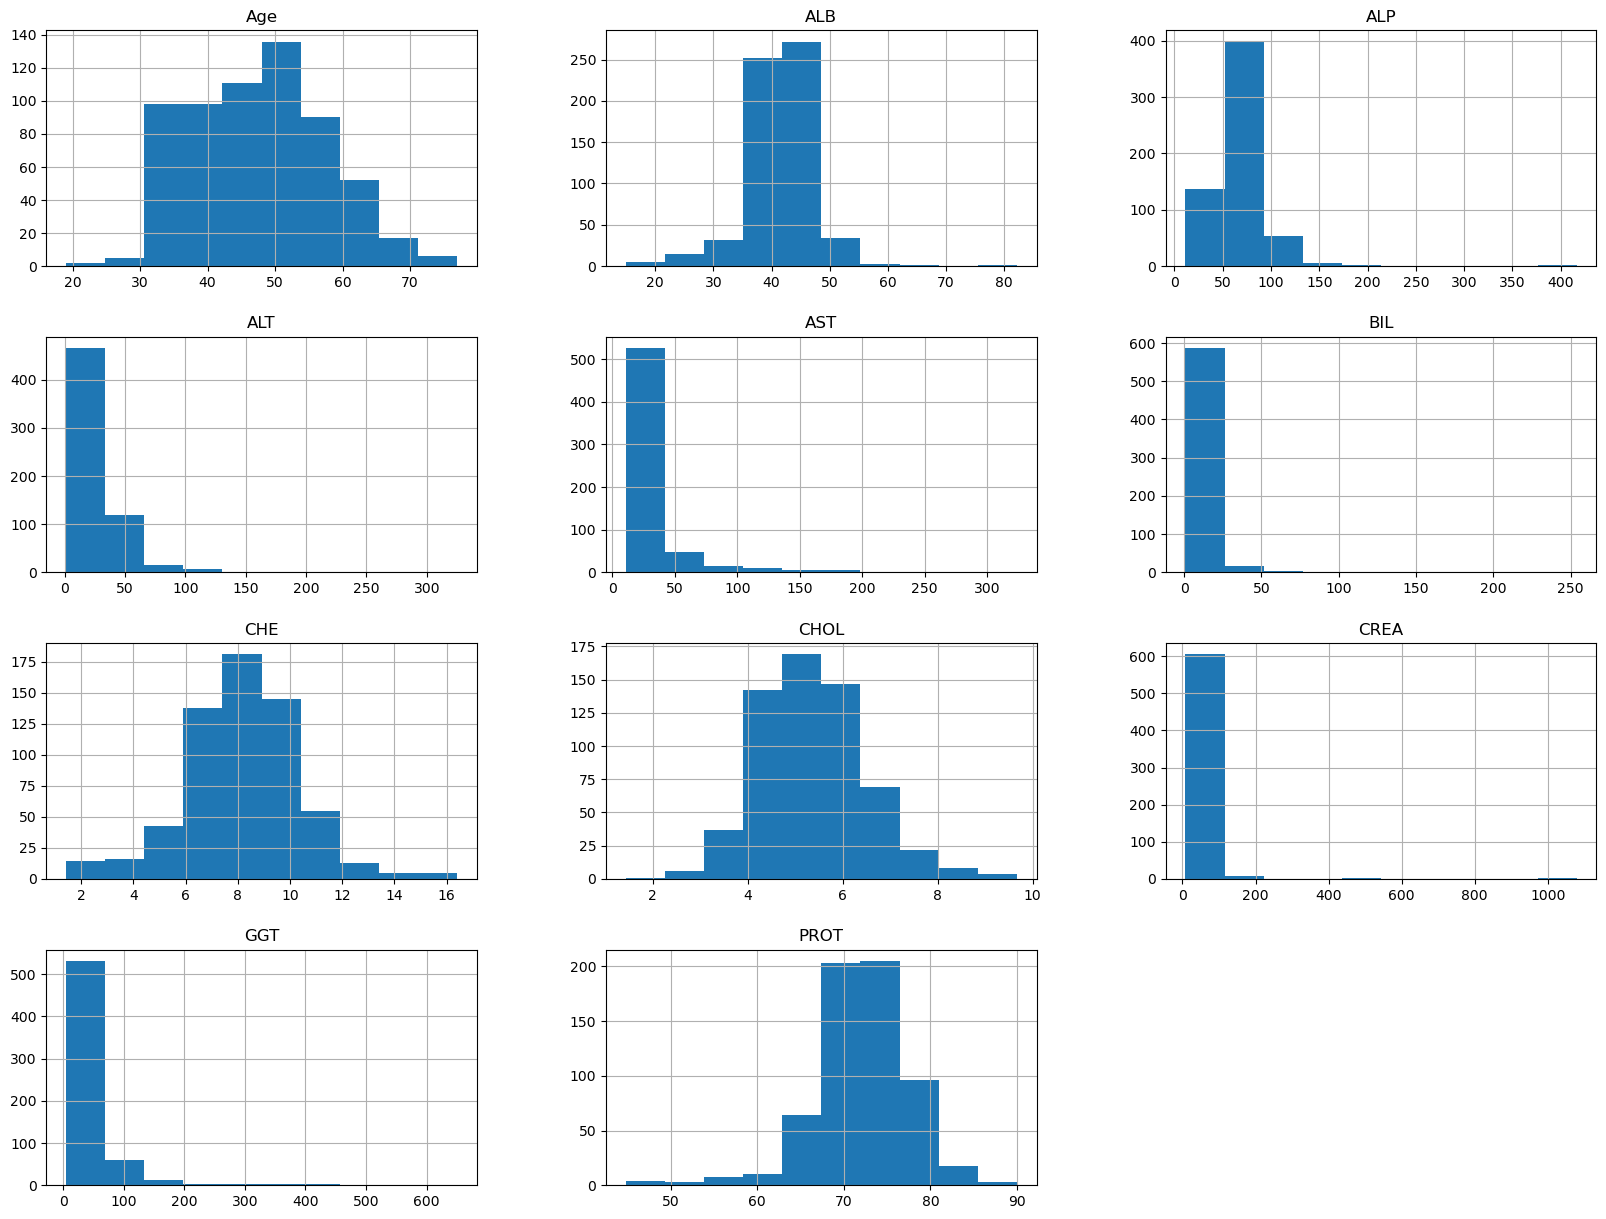

In [60]:
# Matlab plot
df.hist(figsize=(20,15))
plt.show()

## 3.1 Check for 

* duplicate data
* missing data 
* data inconsistencies


In [61]:
### Outlier is fixed in preprocessing using median in previous section
### No duplicate data also 
df.duplicated().sum()

0

### missing data Identification

In [62]:
##---------Type the code below this line------------------##
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [63]:
(df.isnull().sum() > 0).values

array([False, False, False,  True,  True,  True, False, False, False,
        True, False, False,  True])

In [64]:
null_cols_index = [i for i,col in enumerate(df.isnull().sum() > 0) if col == True]
null_cols_index

[3, 4, 5, 9, 12]

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


#### Missing Data treatment

In [65]:
# we are convinced that mean is the better approach  for filling null values
for column in null_present_columns:
    median=df[column].median()
    df[column]=df[column].fillna(median)

In [66]:
(df.isnull().sum() > 0).values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [67]:
print(f'Number of null values : {df.isnull().sum().sum()}')

Number of null values : 0


## 3.3 Encode categorical data


# Target Label Encoding
 so that we can find Blood donor vs Hepatitis Patients 


In [68]:
df['class'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

In [69]:
#additionally string fields are renamed so
category_details = {row.split('=')[0]:row.split('=')[1] for row in df.Category}
category_details

{'0': 'Blood Donor',
 '0s': 'suspect Blood Donor',
 '1': 'Hepatitis',
 '2': 'Fibrosis',
 '3': 'Cirrhosis'}

In [70]:
category_details['4'] = category_details['0s'] 

In [71]:
category_details

{'0': 'Blood Donor',
 '0s': 'suspect Blood Donor',
 '1': 'Hepatitis',
 '2': 'Fibrosis',
 '3': 'Cirrhosis',
 '4': 'suspect Blood Donor'}

In [72]:
del(category_details['0s'])
category_details

{'0': 'Blood Donor',
 '1': 'Hepatitis',
 '2': 'Fibrosis',
 '3': 'Cirrhosis',
 '4': 'suspect Blood Donor'}

In [73]:
swapped_dict = dict([(value, key) for key, value in category_details.items()])

In [74]:
df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})

In [75]:
df['Sex'].unique()

array([0, 1], dtype=int64)

In [76]:
df.Category = df.Category.apply(lambda x: x.split('=')[1])
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,class
0,Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [77]:
df.Category.map(swapped_dict)

0      0
1      0
2      0
3      0
4      0
      ..
610    3
611    3
612    3
613    3
614    3
Name: Category, Length: 615, dtype: object

## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

Not applicable to this dataset.

## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)



*   There is no duplicate data noticed in the dataset.
*   Median was used to impute missing values.
*   There are inconsistencies in the data. Due to lack of business understanding of differenr attributes, we couldn't inconsistencies properly

The chosen dataset is tabular and didn't contain textual columns. Hence no textual processing was done.






## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark



  

> We have used a custom target variable called "***class***"






##---------Type the code below this line------------------##
The target attribute for classification is Category (blood donors vs. Hepatitis C ).



In [78]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT', 'class'],
      dtype='object')

class is the Binary target variable and in the current dataset has around 75 patients and rest all are blood donors. The below graph shows distribution of data and their skewness

Text(0.5, 0, 'GGT')

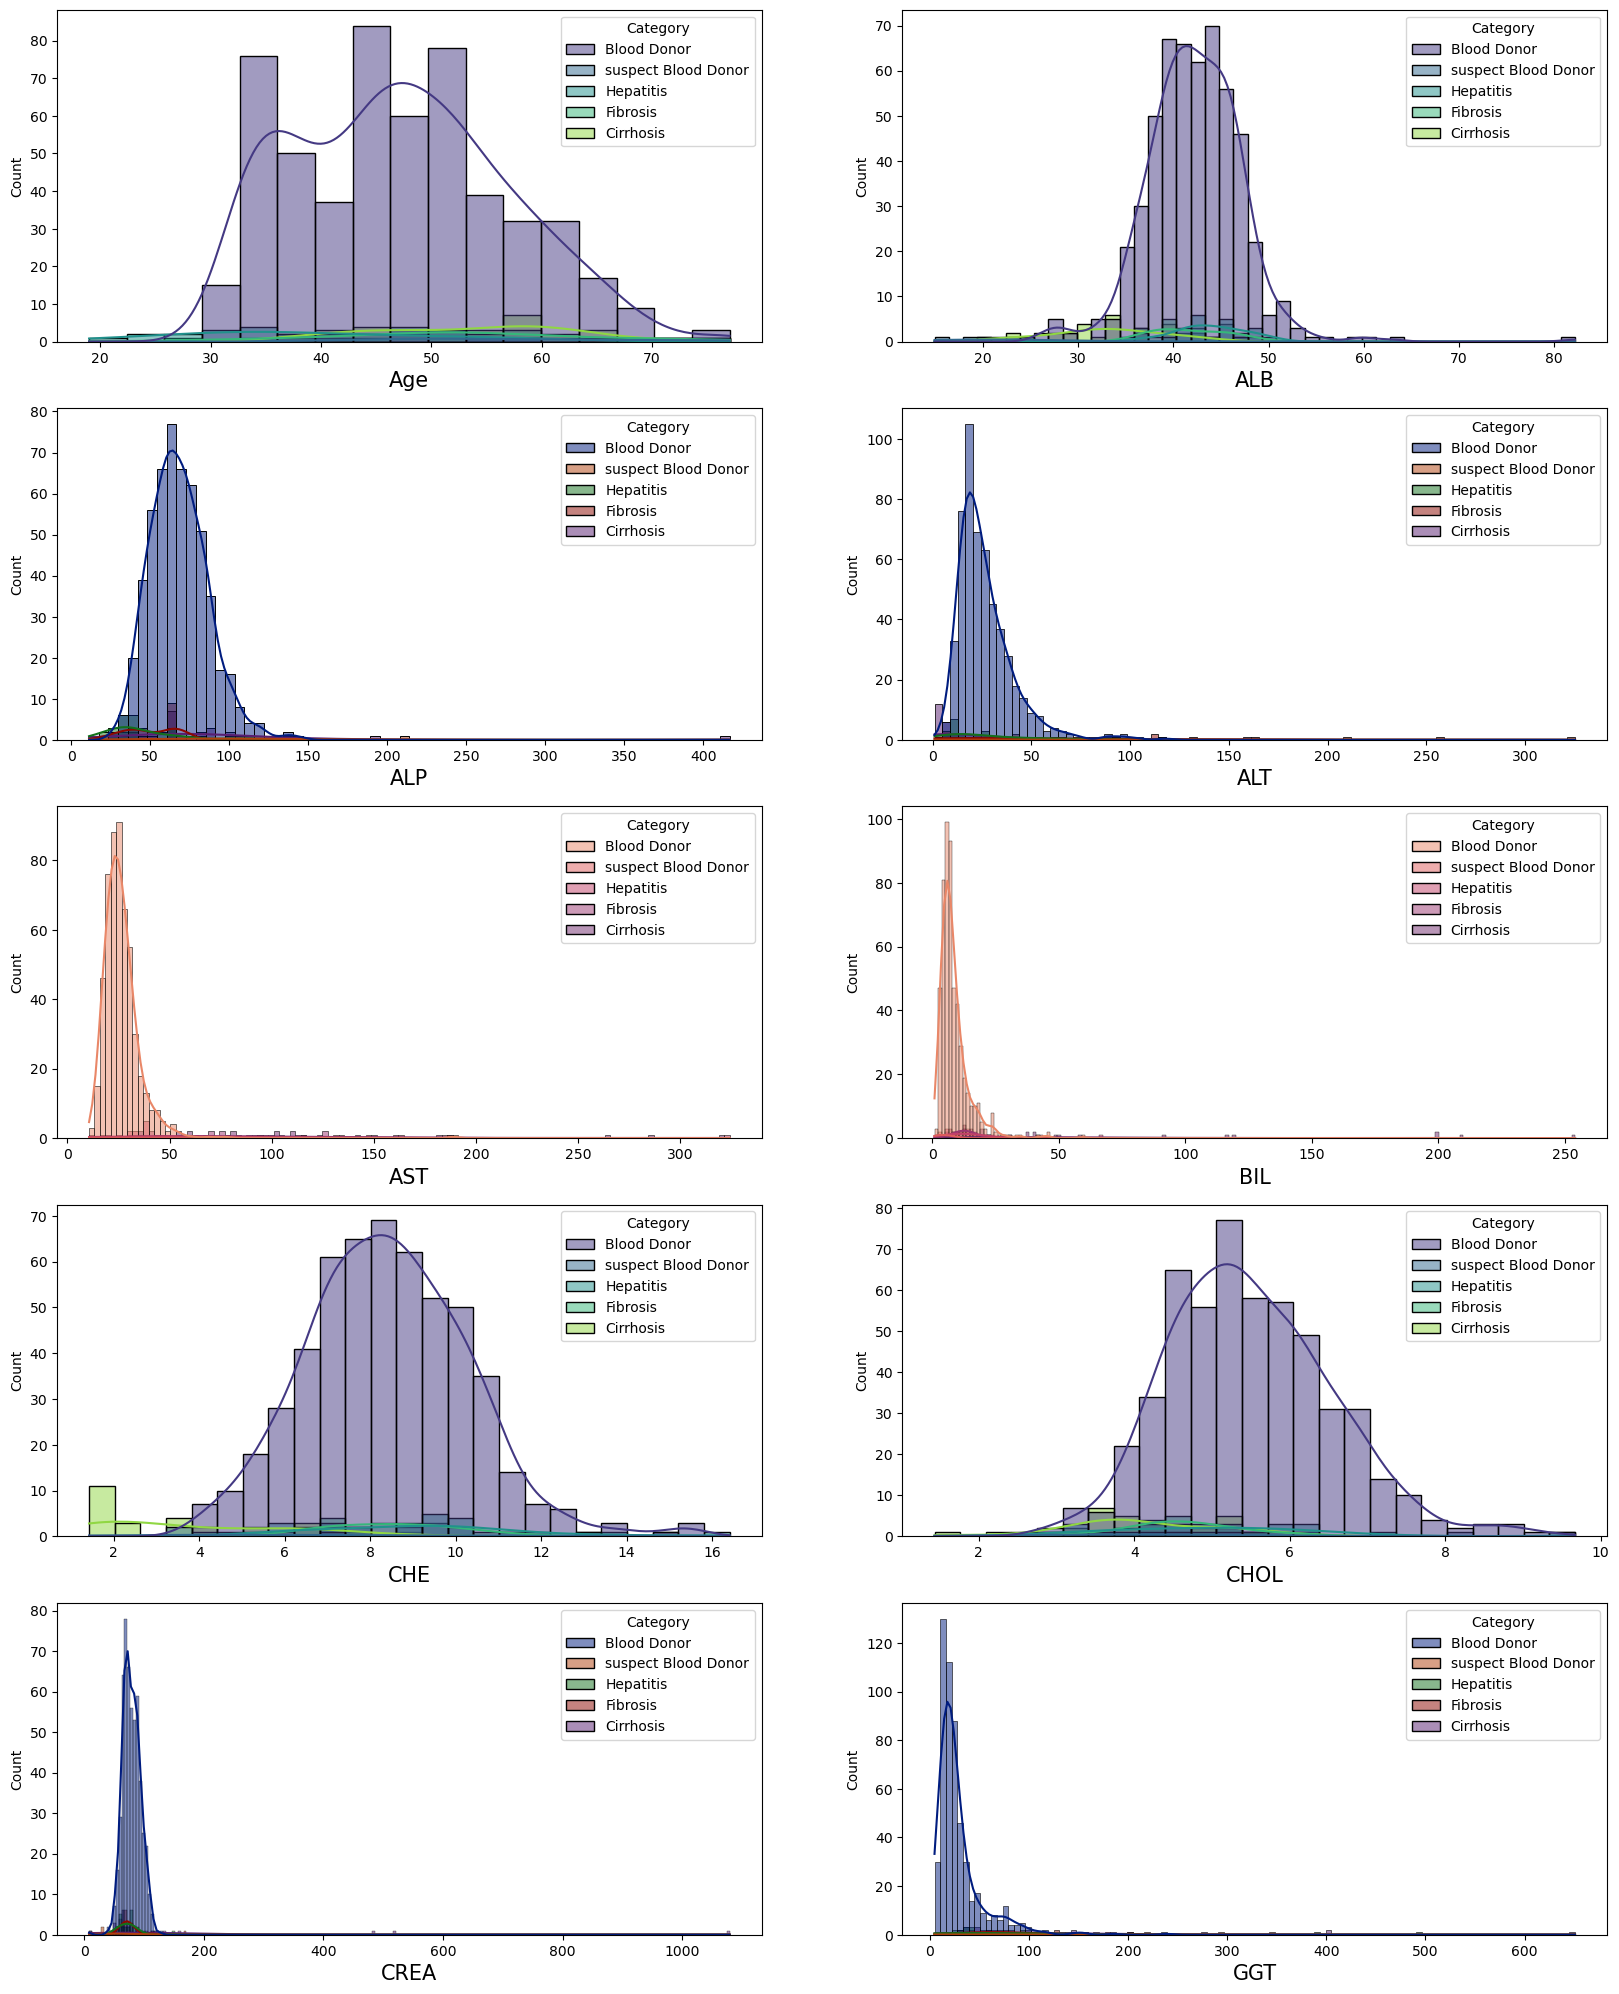

In [79]:

fig, ax = plt.subplots(5,2, figsize=(20,25)) 

sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel("ALB",fontsize=15)

sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel("ALT",fontsize=15)

sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel("BIL",fontsize=15)

sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel("CHOL",fontsize=15)

sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0])
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1])
ax[4,1].set_xlabel("GGT",fontsize=15)

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

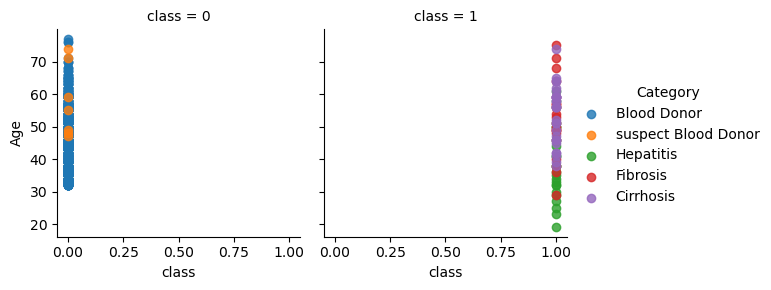

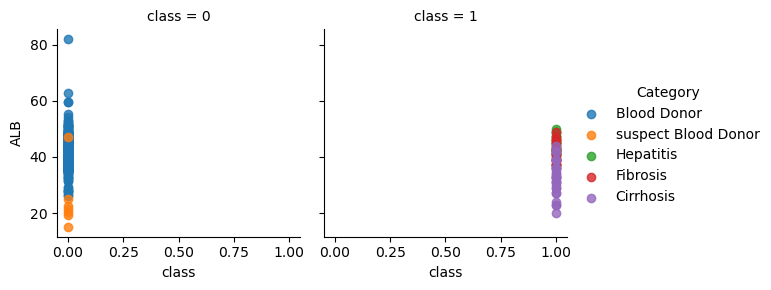

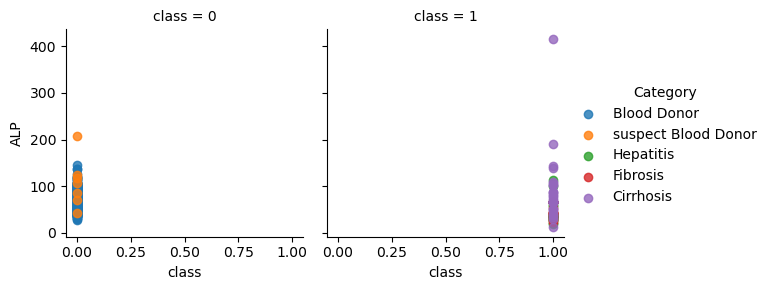

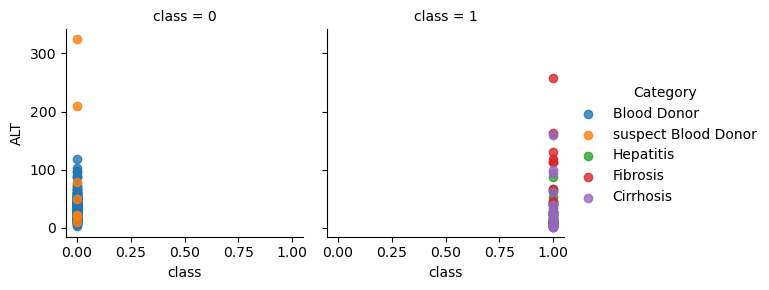

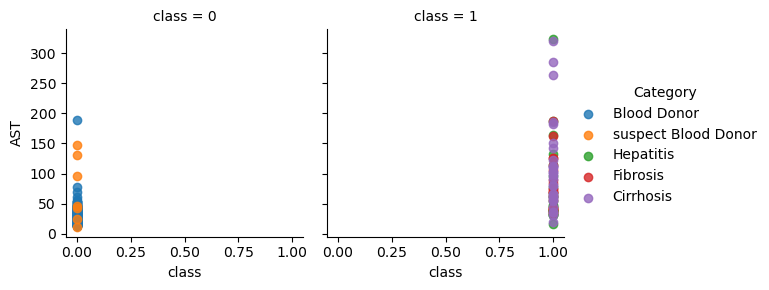

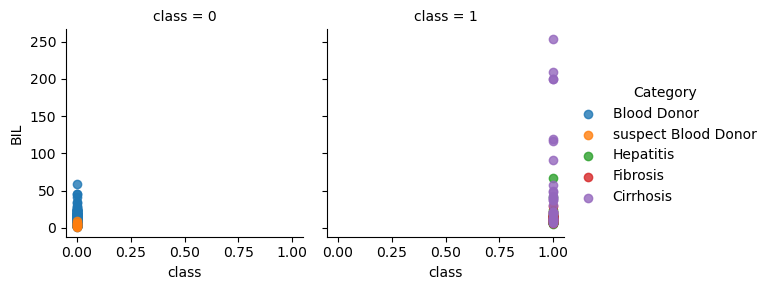

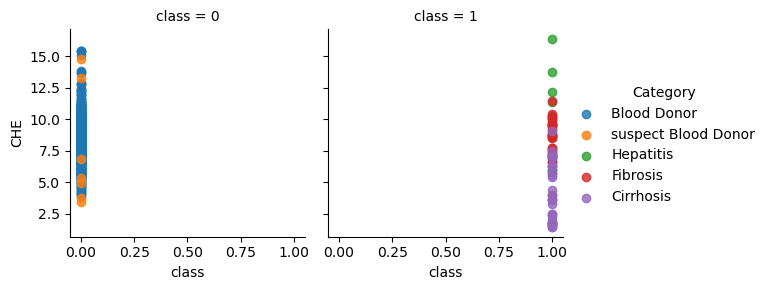

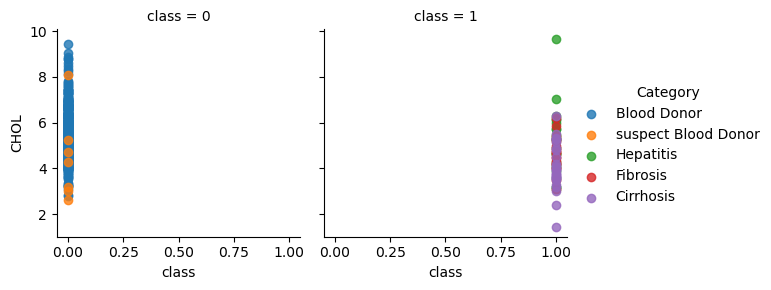

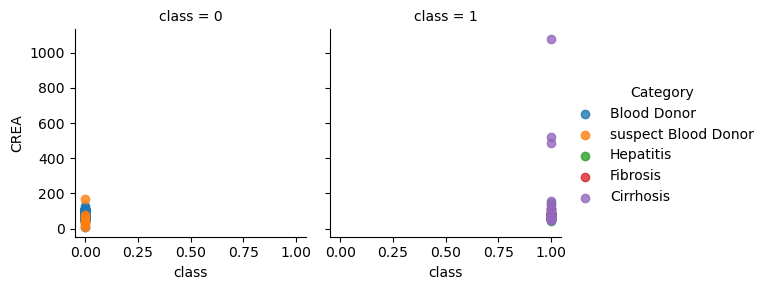

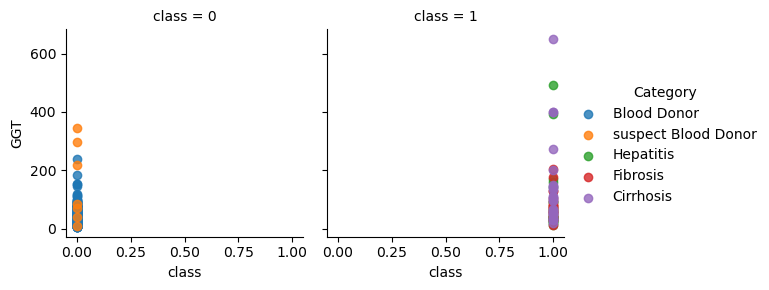

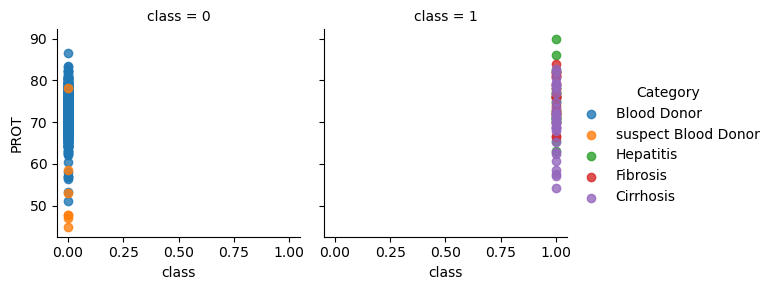

In [80]:
#Scatterplot with regression line regplot() Seaborn

for y in numerical_columns:
    g = sns.FacetGrid(df, col="class", hue="Category")
    g.map_dataframe(sns.regplot, x="class", y=y)
    g.add_legend()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

#### heat map

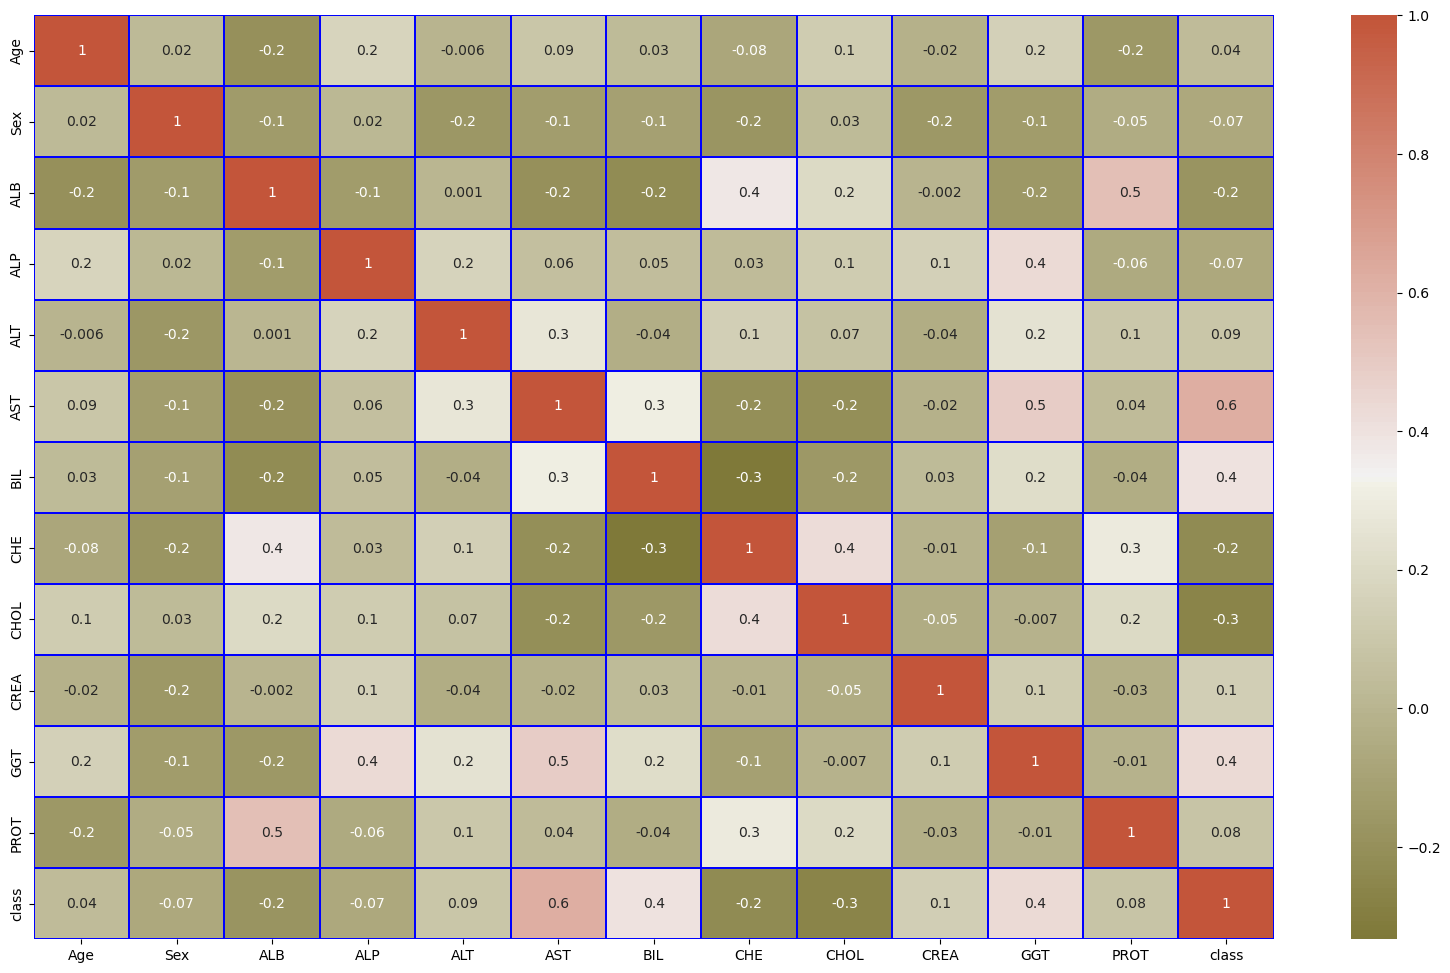

In [81]:
##---------Type the code below this line------------------##
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap=sns.diverging_palette(80, 20, n=200), cbar=True, linewidths=0.2, linecolor='blue')
plt.show()

Here we can assume target variable class has high correleation with CGT and AST feature

#### pairplot

#### Pair plot has been put in two sections 

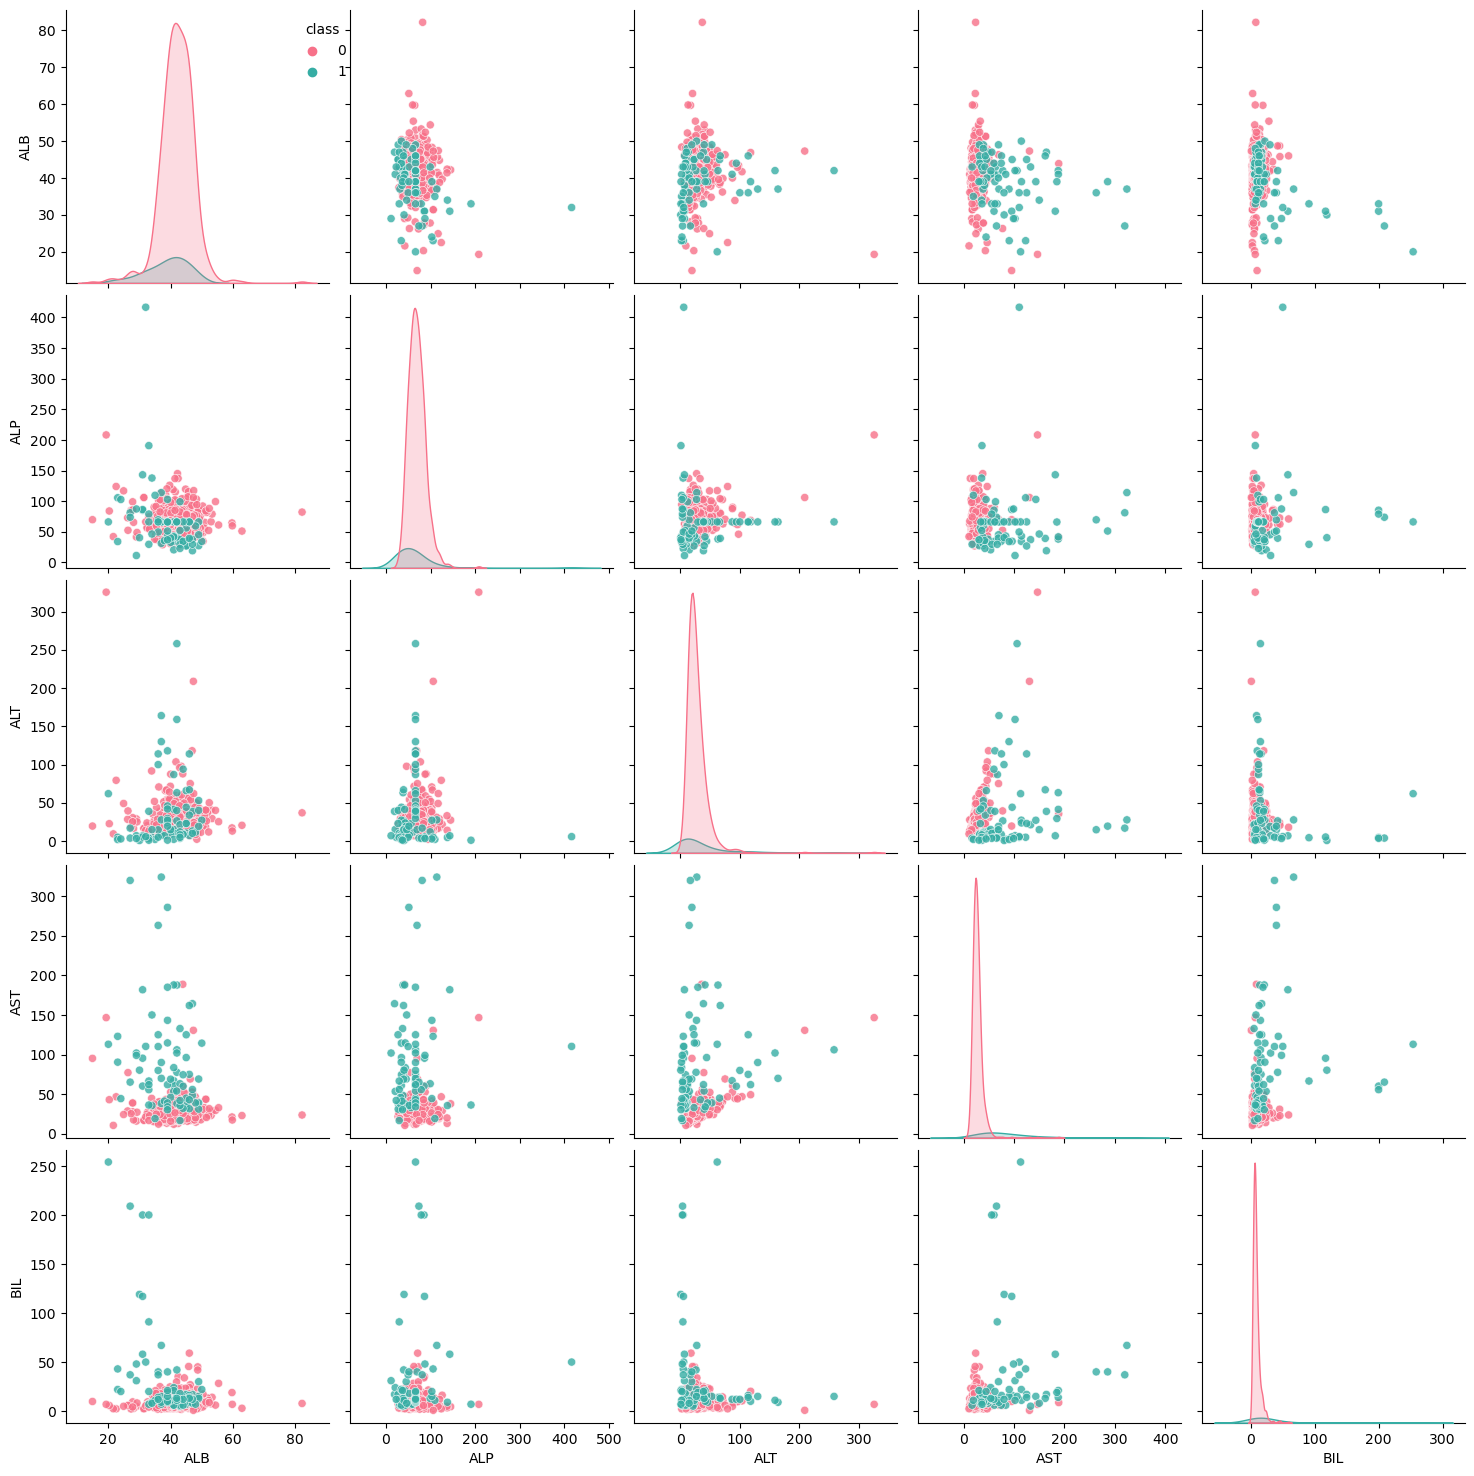

In [82]:
g = sns.pairplot(df, x_vars = ['ALB', 'ALP', 'ALT', 'AST', 'BIL'], 
               y_vars = ['ALB', 'ALP', 'ALT', 'AST', 'BIL'], 
               kind= 'scatter',
               hue = 'class',
               palette = 'husl',
               height = 3,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

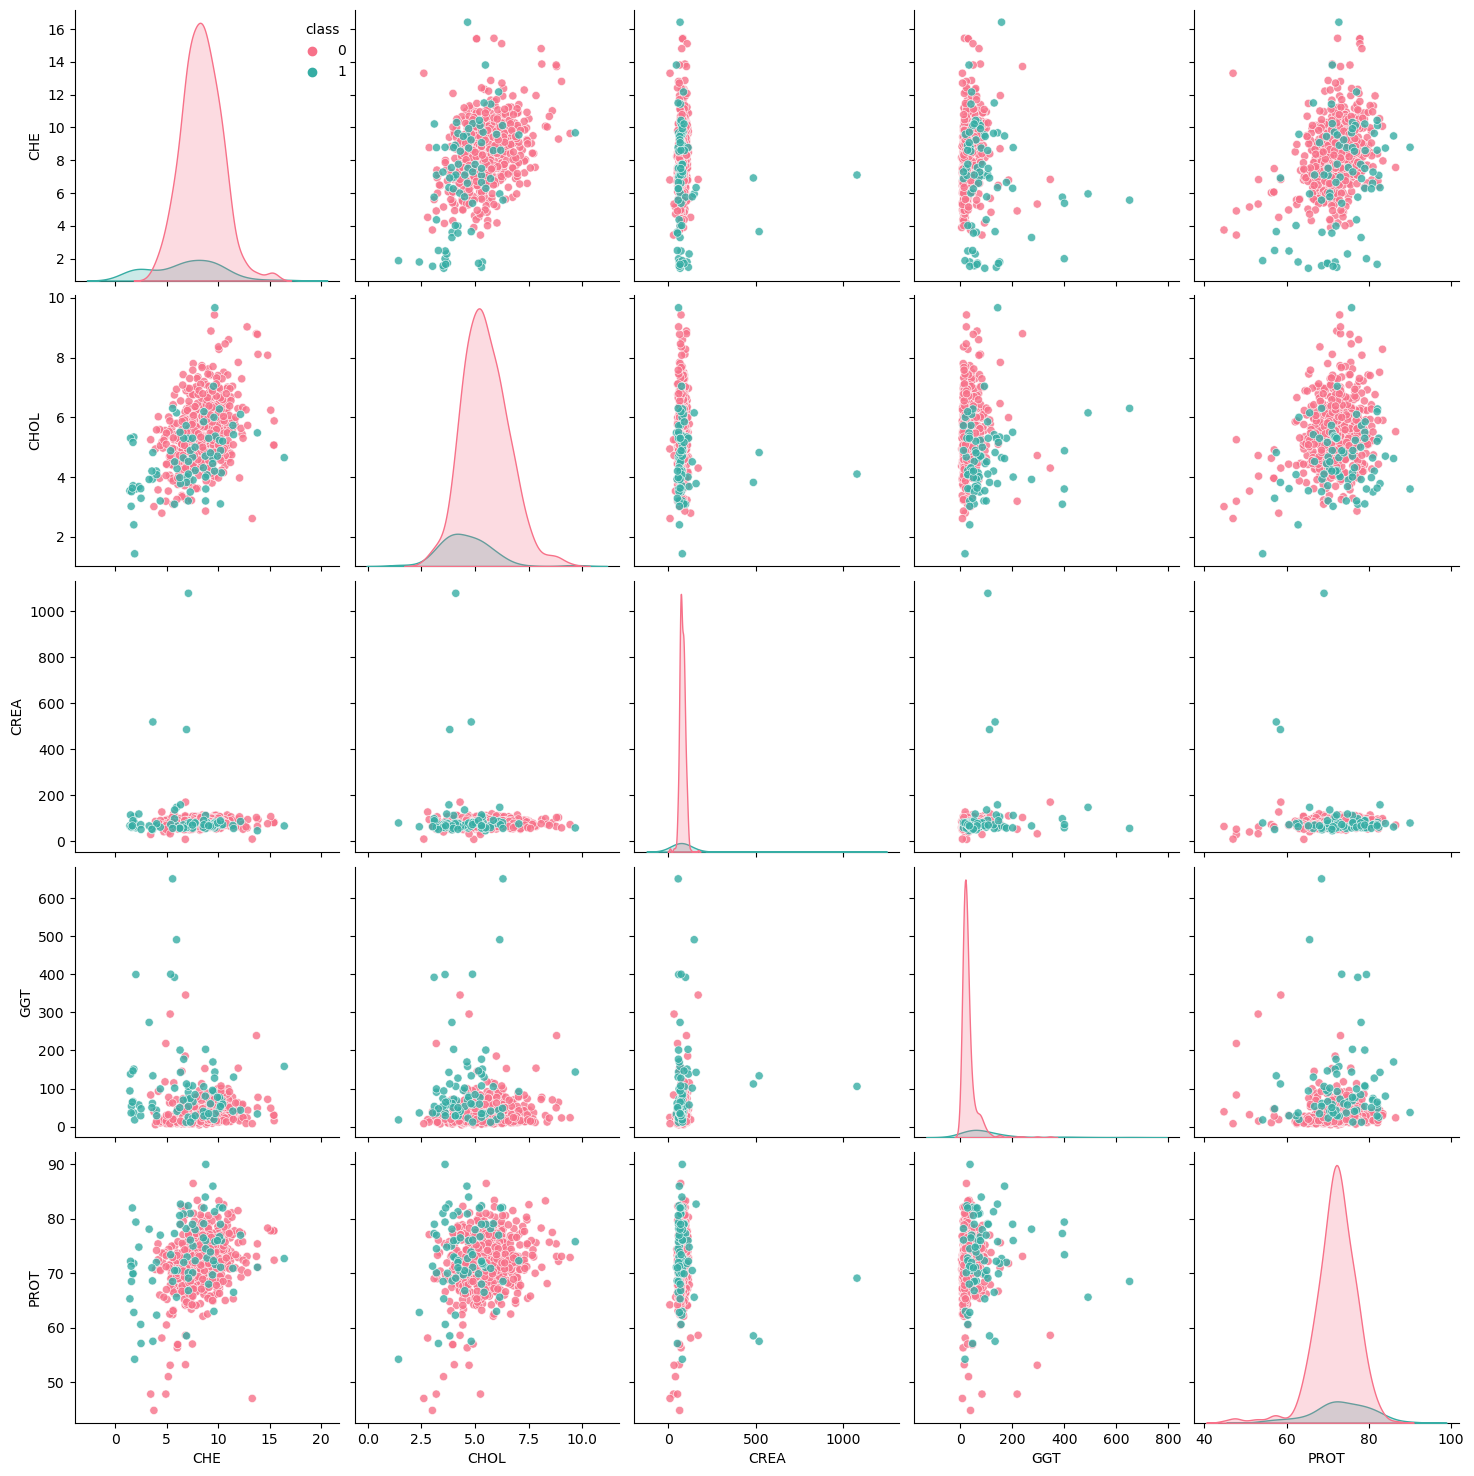

In [83]:
g = sns.pairplot(df, x_vars = ['CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'], 
               y_vars = ['CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'], 
               kind= 'scatter',
               hue = 'class',
               palette = 'husl',
               height = 3,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

#### Visualize the Label Class


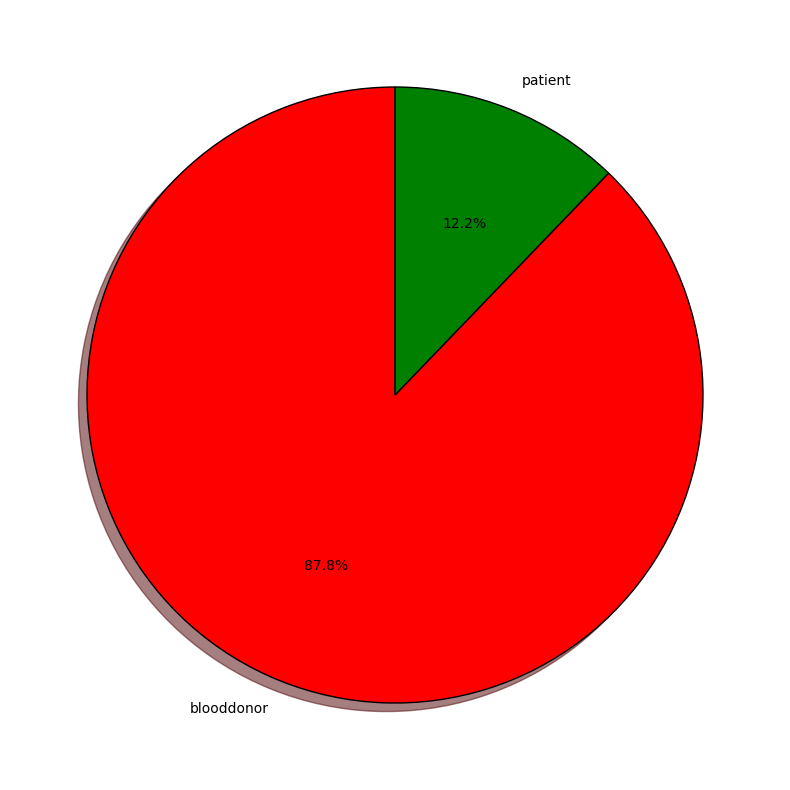

In [84]:
blooddonor = df[df['class'] == 0].shape[0]
patient = df[df['class'] == 1].shape[0]

label = [blooddonor, patient]
plt.pie(label, labels = ['blooddonor', 'patient'], shadow = True, wedgeprops = {'edgecolor': 'black'},
       autopct = '%1.1f%%', startangle = 90, colors = ['red', 'green'])
plt.tight_layout()
plt.show()

We observe that we have Imbalance problem occur where one of the "Blood donor"  having more sample than other classes(patient). 

In [85]:
numerical_columns

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'],
      dtype='object')

In [86]:
#split target and independent variables

X = df.drop(columns=['Category', 'class'])
class_y=df['class']

In [87]:
class_y.shape

(615,)

In [88]:
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

### Identify top 5 significant features

Methods used are 
1)  Pearson correlation
2)  entropy impurity and  Information Gain
3)  Gini impurity and  Information Gain
4)  Chi-Squared function to select best feature
5)  Recursive Feature Elimination (RFE) 
And our understanding is below are five significant features to target  class variable
1) GGT
2) AST
3) BIL
4) ALT
5) ALP

#### Pearson correlation and business understanding says that AST(0.609818) elevated is a symptom of Hepatitis issue

In [89]:
target = 'class'
df.corr(method ='pearson')[target].sort_values(ascending=False)

class    1.000000
AST      0.621724
GGT      0.437680
BIL      0.398451
CREA     0.136772
ALT      0.087787
PROT     0.084082
Age      0.037781
ALP     -0.067737
Sex     -0.071663
ALB     -0.179609
CHE     -0.230785
CHOL    -0.266003
Name: class, dtype: float64



> Please note the top 5 features returned by Pearson correlation. 


1.   AST
2.   GGT
3.   BIL
4.   CREA
5.   ALT








#### measure Overall Dataset impurity  using entropy and Gini

To understand the impuruty level of the entire dataset,we have done below imputation.

In [90]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))


# let's do two quick examples.
print('impurity using entropy:', compute_impurity(df, 'entropy'))
print('impurity using gini index:', compute_impurity(df, 'gini'))
# how to test for an incorrect compute_impurity_criterion value:
# print('impurity using gini index:', compute_impurity(df['stream'], 'foo'))

impurity using entropy: 9.264
impurity using gini index: 0.998


#### Information Gain Gini Entropy for each feature

In [91]:
#Information Gain = Entropy before splitting - Entropy after splitting
#GainRatio = Gain Ratio=Information Gain/Entropy

def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """
   
            
    target_entropy = compute_impurity(df[target], split_criterion)


    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    #print('impurity of partitions:', entropy_list)
    #print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    #print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    #print('information gain:', information_gain)
    
    #print('====================')
    dict1 = {'target feature':target,'descriptive_feature':descriptive_feature,'split criterion':split_criterion,
             'target_entropy':target_entropy, 'remaining impurity':feature_remaining_impurity, 'information_gain':information_gain}
    return(dict1)

In [92]:
split_criterion = 'entropy'
rows_list = []
for idx, feature in enumerate(X.columns):
    dict = comp_feature_information_gain(df, 'class', feature, split_criterion,)
    rows_list.append(dict)
dfresult_information_gain = pd.DataFrame(rows_list)               


In [93]:
dfresult_information_gain.nlargest(12,'information_gain')

,target feature,descriptive_feature,split criterion,target_entropy,remaining impurity,information_gain
5,class,AST,entropy,0.535,0.043624,0.491376
10,class,GGT,entropy,0.535,0.048360,0.486640
3,class,ALP,entropy,0.535,0.066334,0.468666
6,class,BIL,entropy,0.535,0.097449,0.437551
4,class,ALT,entropy,0.535,0.104571,0.430429
7,class,CHE,entropy,0.535,0.111531,0.423469
9,class,CREA,entropy,0.535,0.153581,0.381419
8,class,CHOL,entropy,0.535,0.164387,0.370613
2,class,ALB,entropy,0.535,0.176009,0.358991
11,class,PROT,entropy,0.535,0.241800,0.293200


By Information gain also, we notice the top 5 features are identified to be the same set as pearson co-eff 

In [94]:
split_criterion = 'gini'
rows_list = []
for idx, feature in enumerate(X.columns):
    dict = comp_feature_information_gain(df, 'class', feature, split_criterion)
    rows_list.append(dict)
dfresult_information_gain_gini = pd.DataFrame(rows_list)   

In [95]:
dfresult_information_gain_gini.nlargest(12,'information_gain')

,target feature,descriptive_feature,split criterion,target_entropy,remaining impurity,information_gain
5,class,AST,gini,0.214,0.020690,0.193310
10,class,GGT,gini,0.214,0.023880,0.190120
3,class,ALP,gini,0.214,0.031005,0.182995
6,class,BIL,gini,0.214,0.045974,0.168026
4,class,ALT,gini,0.214,0.049875,0.164125
7,class,CHE,gini,0.214,0.054505,0.159495
9,class,CREA,gini,0.214,0.061661,0.152339
8,class,CHOL,gini,0.214,0.078535,0.135465
2,class,ALB,gini,0.214,0.085522,0.128478
11,class,PROT,gini,0.214,0.110032,0.103968


Similar pattern of high significance to target variable was found in top 5 variables found in pearson co-eff

In [96]:
X.columns

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT'],
      dtype='object')

#### chi2 feature selection

In [97]:
xfeatures = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT']]
ylabels = df['class']

In [98]:
# using Skbest
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(xfeatures,ylabels)

In [99]:
print("Scores",best_feature_fit.scores_)

Scores [1.86914529e+00 1.93613445e+00 1.58766657e+01 2.71603546e+01
 1.07756618e+02 7.47078957e+03 3.31044203e+03 1.94099492e+01
 1.02177911e+01 3.49808305e+02 8.88949717e+03 1.75583211e+00]


In [100]:
# Transform(Optional)
bf_02 = best_feature_fit.transform(xfeatures)

In [101]:
bf_02

array([[  0.  ,  38.5 ,  52.5 , ...,   3.23, 106.  ,  12.1 ],
       [  0.  ,  38.5 ,  70.3 , ...,   4.8 ,  74.  ,  15.6 ],
       [  0.  ,  46.9 ,  74.7 , ...,   5.2 ,  86.  ,  33.2 ],
       ...,
       [  1.  ,  29.  ,  87.3 , ...,   3.63,  66.7 ,  64.2 ],
       [  1.  ,  33.  ,  66.2 , ...,   4.2 ,  52.  ,  50.  ],
       [  1.  ,  36.  ,  66.2 , ...,   5.3 ,  67.  ,  34.  ]])

In [102]:
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [103]:
feature_scores

,Feature_Scores
0,1.869145
1,1.936134
2,15.876666
3,27.160355
4,107.756618
5,7470.789570
6,3310.442032
7,19.409949
8,10.217791
9,349.808305


In [104]:
feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [105]:
# Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(12,'Feature_Scores')

,Feature_Scores,Feature_name
10,8889.497166,GGT
5,7470.789570,AST
6,3310.442032,BIL
9,349.808305,CREA
4,107.756618,ALT
3,27.160355,ALP
7,19.409949,CHE
2,15.876666,ALB
8,10.217791,CHOL
1,1.936134,Sex


In [106]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['GGT', 'AST', 'BIL', 'CREA', 'ALT', 'ALP', 'CHE', 'ALB', 'CHOL',
       'Sex', 'Age', 'PROT'], dtype=object)

We selected K best features using Chi-Squared lambda function. 

In [107]:
xfeatures

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [108]:
class_y

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: class, Length: 615, dtype: int64

In [109]:
#  RFE - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
logit = LogisticRegression()
rfe = RFE(logit)


In [110]:
rfe_fit = rfe.fit(xfeatures,ylabels)


In [111]:

# Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])

In [112]:
rfe_feature_df = pd.concat([feature_column_names,selected_features,ranking_features],axis=1)


In [113]:
rfe_feature_df


,Feature_name,Selected_Features,ranking_Features
0,Age,False,3
1,Sex,True,1
2,ALB,True,1
3,ALP,False,2
4,ALT,False,7
5,AST,True,1
6,BIL,True,1
7,CHE,False,5
8,CHOL,True,1
9,CREA,False,6


## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

We choosed feature which had high score/rank in pearson correlation, chi2 (select k best), RPE.
Also validation that those columns high information gain and less impurity(entropy, gini)

### Summary of feature selection
To summarize Methods used are 
1)  Pearson correlation
2)  entropy impurity and  Information Gain
3)  Gini impurity and  Information Gain
4)  Chi-Squared function to select best feature
5)  Recursive Feature Elimination (RFE) 
And our understanding is below are five significant features to target  class variable
1) GGT
2) AST
3) BIL
4) ALT
5) ALP

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms
1. Classification -- Decision Tree classifier 

2. Clustering -- kmeans

3. Association Analysis

4. Anomaly detection

5. Textual data -- Naive Bayes classifier (not taught in this course)

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

ML Techniques used 
    LogisticRegression
    DecisionTreeClassifier
    KNeighborsClassifier

## 6.1 ML technique 1 + Justification

In [114]:
# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
# Metrics

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [115]:
models  = {}

In [116]:
# Features for Initial Data
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT', 'class'],
      dtype='object')

In [117]:
xfeatures

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [118]:

ylabels = df['class']

In [119]:
# Selecting the top 5 features based on the relevance of features from various previous feature imp algos
xfeatures_best = df[['GGT','AST','BIL','ALT','ALP']]

In [120]:
# Displaying top 5 rows
xfeatures_best.head()

,GGT,AST,BIL,ALT,ALP
0,12.1,22.1,7.5,7.7,52.5
1,15.6,24.7,3.9,18.0,70.3
2,33.2,52.6,6.1,36.2,74.7
3,33.8,22.6,18.9,30.6,52.0
4,29.9,24.8,9.6,32.6,74.1


In [121]:
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.3, random_state=42)

In [122]:
xb_train, xb_test, yb_train, yb_test = train_test_split(xfeatures_best, ylabels, test_size=0.3, random_state=42)

In [123]:
scaler = StandardScaler()
kfold = KFold(n_splits=10, random_state=(7), shuffle=(True))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [124]:
scaler = StandardScaler()

xb_train = scaler.fit_transform(xb_train)
xb_test = scaler.transform(xb_test)

In [125]:
lr= LogisticRegression()
lr2= LogisticRegression()

In [126]:
print('The accuracy of the logistic regression trained on all features :  ',round(lr.fit(x_train,y_train).score(x_train,y_train),2))

The accuracy of the logistic regression trained on all features :   0.97


In [127]:
print('The accuracy of the logistic regression trained on best features :  ',round(lr2.fit(xb_train,yb_train).score(xb_train,yb_train),2))

The accuracy of the logistic regression trained on best features :   0.95


In [128]:
prediction=lr.predict(x_test)

In [129]:
prediction2=lr2.predict(xb_test)

In [130]:
# The higher the Mean accuracy of a model, the better is it predication
result_accuracy = cross_val_score(lr, xfeatures_best, ylabels, cv=kfold, scoring='accuracy')
print("%s: Mean Accuracy = %.2f%% \t SD Accuracy = %.2f%%" % ('Logistic Regression', result_accuracy.mean()*100,
result_accuracy.std()*100))

Logistic Regression: Mean Accuracy = 94.13% 	 SD Accuracy = 2.87%


In [131]:
result_recall = cross_val_score(lr, xfeatures_best, ylabels, cv=kfold, scoring='recall')
print("%s: Mean Recall = %.2f%% \t SD recall = %.2f%%" % ('Logistic Regression', result_recall.mean()*100,
result_recall.std()*100))

Logistic Regression: Mean Recall = 62.00% 	 SD recall = 24.20%


In [132]:

confusion_matrix(y_test,prediction)

array([[154,   2],
       [ 16,  13]], dtype=int64)

In [133]:

confusion_matrix(yb_test,prediction2)

array([[153,   3],
       [ 15,  14]], dtype=int64)

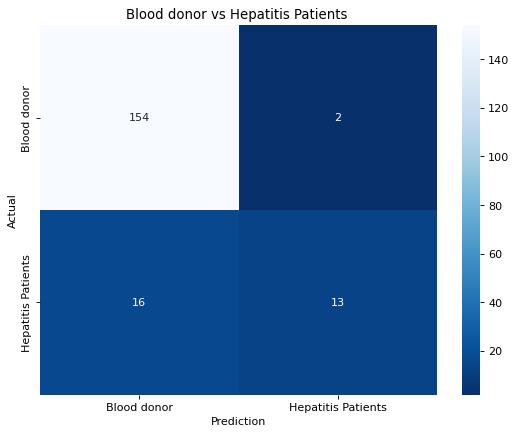

In [134]:
#Blood donor vs Hepatitis Patients 
pred_ls = prediction
test_ls = y_test

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

CLASSES = ['Blood donor','Hepatitis Patients']
ax = sns.heatmap(conf_arr, cmap="Blues_r", annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Blood donor vs Hepatitis Patients ')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show(ax)

In [135]:
accuracy = metrics.accuracy_score(y_test, prediction)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, prediction)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, prediction)
print("Recall score:",recall)
f1 = metrics.f1_score(y_test, prediction)
print("F1 score:",f1)

Accuracy score: 0.9027027027027027
Precision score: 0.8666666666666667
Recall score: 0.4482758620689655
F1 score: 0.5909090909090909


In [136]:
models['Logistic Regression All'] = {'recall':recall,'precision':precision,'accuracy':accuracy,'f1':f1}

In [137]:
accuracy = metrics.accuracy_score(y_test, prediction2)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, prediction2)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, prediction2)
print("Recall score:",recall)
f1 = metrics.f1_score(y_test, prediction2)
print("F1 score:",f1)

Accuracy score: 0.9027027027027027
Precision score: 0.8235294117647058
Recall score: 0.4827586206896552
F1 score: 0.608695652173913


In [138]:
models['Logistic Regression best features'] = {'recall':recall,'precision':precision,'accuracy':accuracy,'f1':f1}

#### Justification

The model has a 90 % accuracy score. Should experiment other ml methods for higher accuracy
The experimental results indicated that the proposed framework achieved higher accuracies when full feature set is used 
than without feature selection.

## 6.2 ML technique 2 + Justification

In [139]:
##---------Type the code below this line------------------##

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [141]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

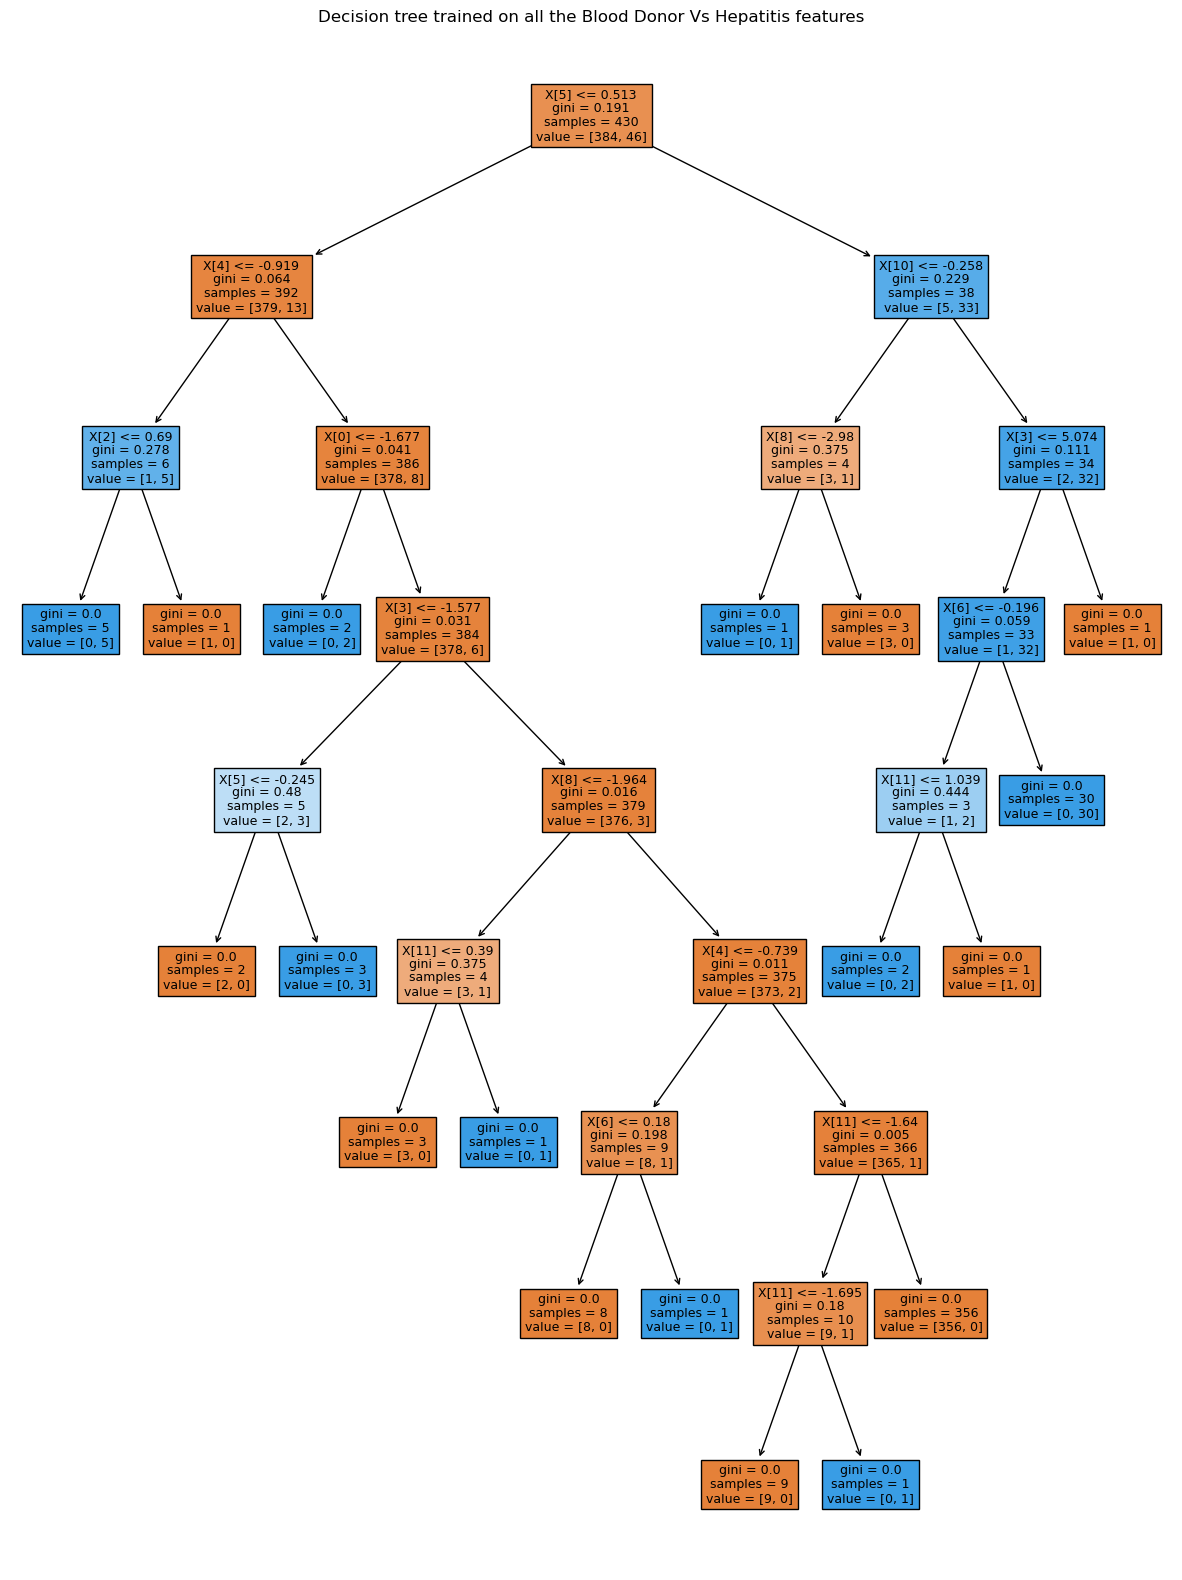

In [142]:

plt.figure(figsize=(15, 20))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the Blood Donor Vs Hepatitis features")
plt.show()

In [143]:
prediction_clf=clf.predict(x_test)

In [144]:

print(confusion_matrix(y_test,prediction_clf))

[[151   5]
 [  8  21]]


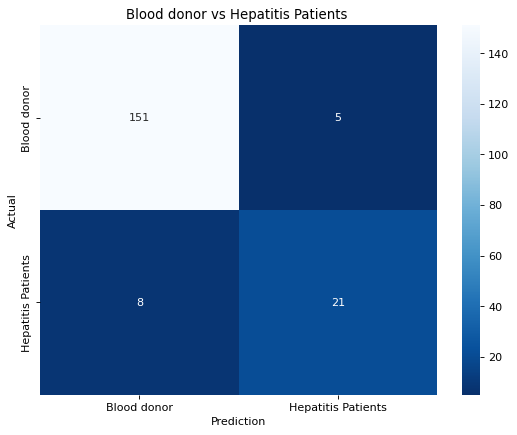

In [145]:
#Blood donor vs Hepatitis Patients 
pred_ls = prediction_clf
test_ls = y_test

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

CLASSES = ['Blood donor','Hepatitis Patients']
ax = sns.heatmap(conf_arr, cmap="Blues_r", annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Blood donor vs Hepatitis Patients ')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show(ax)

In [146]:
accuracy = metrics.accuracy_score(y_test, prediction_clf)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, prediction_clf)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, prediction_clf)
print("Recall score:",recall)
f1 = metrics.f1_score(y_test, prediction_clf)
print("F1 score:",f1)

Accuracy score: 0.9297297297297298
Precision score: 0.8076923076923077
Recall score: 0.7241379310344828
F1 score: 0.7636363636363636


In [147]:
models['Decision Tree All'] = {'recall':recall,'precision':precision,'accuracy':accuracy,'f1':f1}

In [148]:
# On the best features dataset
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xb_train,yb_train)

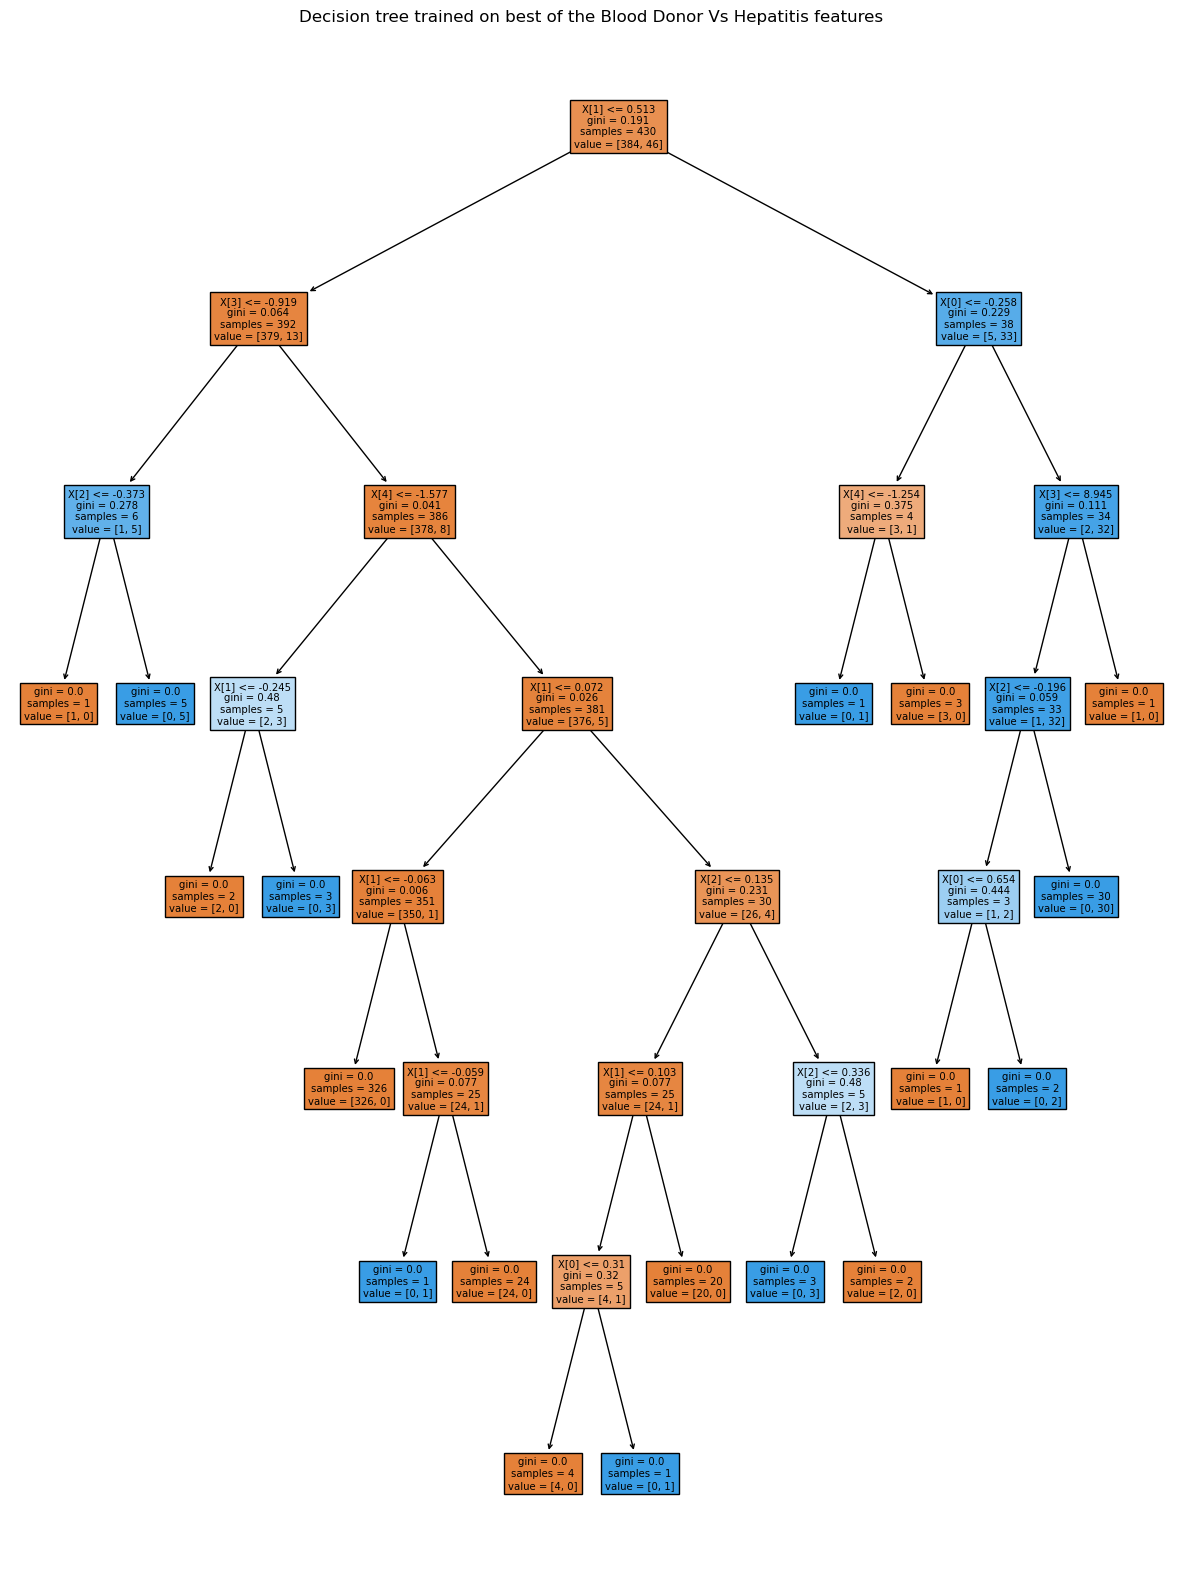

In [149]:

plt.figure(figsize=(15, 20))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on best of the Blood Donor Vs Hepatitis features")
plt.show()

In [150]:
prediction_clf=clf.predict(xb_test)

In [151]:
confusion_matrix(y_test,prediction_clf)

array([[151,   5],
       [  8,  21]], dtype=int64)

In [152]:
accuracy = metrics.accuracy_score(y_test, prediction_clf)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, prediction_clf)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, prediction_clf)
print("Recall score:",recall)
f1 = metrics.f1_score(y_test, prediction_clf)
print("F1 score:",f1)

Accuracy score: 0.9297297297297298
Precision score: 0.8076923076923077
Recall score: 0.7241379310344828
F1 score: 0.7636363636363636


In [153]:
models['Decision Tree for best features'] = {'recall':recall,'precision':precision,'accuracy':accuracy,'f1':f1}

### 6.2 ML technique 3 + Justification

In [154]:
# Step 9 - Compare classification algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [155]:
k_range = range(1, 10)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    s=metrics.accuracy_score(y_test, y_pred)
    scores.append(s)
    print(f'K {k} =  {s}')

#print(scores)

K 1 =  0.8918918918918919
K 2 =  0.8810810810810811
K 3 =  0.8918918918918919
K 4 =  0.8810810810810811
K 5 =  0.8864864864864865
K 6 =  0.8810810810810811
K 7 =  0.8864864864864865
K 8 =  0.8702702702702703
K 9 =  0.8756756756756757


Text(0.5, 1.0, 'KNN trained on all the Blood Donor Vs Hepatitis features')

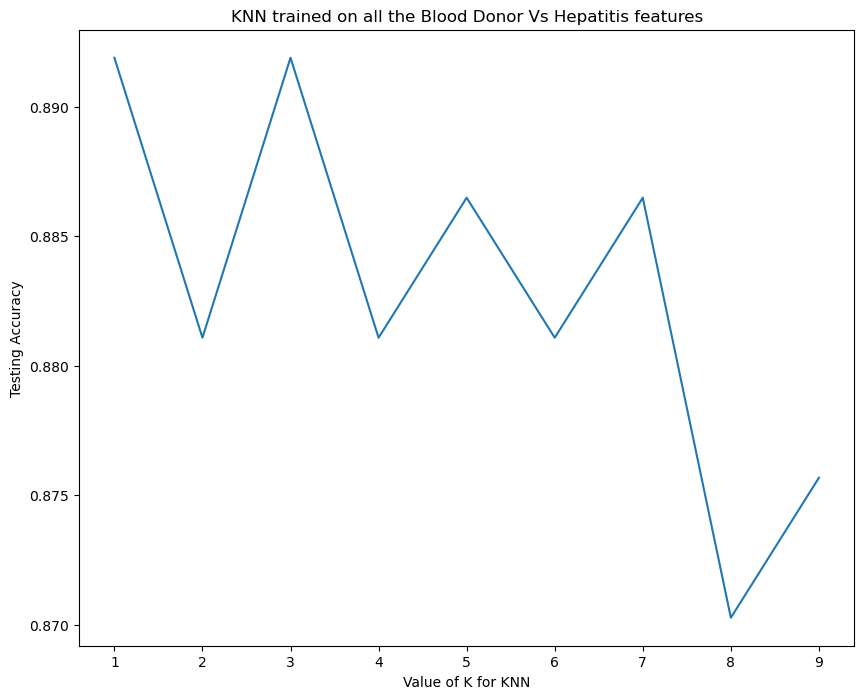

In [156]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("KNN trained on all the Blood Donor Vs Hepatitis features")

In [157]:
knn_Sklearn = KNeighborsClassifier(n_neighbors= 3)


In [158]:
knn_Sklearn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [159]:
Y_predict_Sklearn = knn_Sklearn.predict(x_test)
Y_predict_Sklearn

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [160]:
Accuracy_Sklearn = metrics.accuracy_score(Y_predict_Sklearn, y_test)
print('Accuracy Score:', Accuracy_Sklearn)

Accuracy Score: 0.8918918918918919


In [161]:
# prediction based on k=2
accuracy = metrics.accuracy_score(y_test, Y_predict_Sklearn)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, Y_predict_Sklearn)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, Y_predict_Sklearn)
print("Recall score:",recall)
f1 = metrics.f1_score(y_test, Y_predict_Sklearn)
print("F1 score:",f1)

Accuracy score: 0.8918918918918919
Precision score: 0.9090909090909091
Recall score: 0.3448275862068966
F1 score: 0.5000000000000001


In [162]:
models['KNN for whole features'] = {'recall':recall,'precision':precision,'accuracy':accuracy,'f1':f1}

In [163]:
k_range = range(1, 10)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xb_train, yb_train)
    yb_pred = knn.predict(xb_test)
    s=metrics.accuracy_score(yb_test, yb_pred)
    scores.append(s)
    print(f'K {k} =  {s}')

#print(scores)

K 1 =  0.9405405405405406
K 2 =  0.9135135135135135
K 3 =  0.9351351351351351
K 4 =  0.918918918918919
K 5 =  0.9297297297297298
K 6 =  0.9027027027027027
K 7 =  0.9081081081081082
K 8 =  0.8972972972972973
K 9 =  0.9027027027027027


Text(0.5, 1.0, 'KNN trained on best features the Blood Donor Vs Hepatitis features')

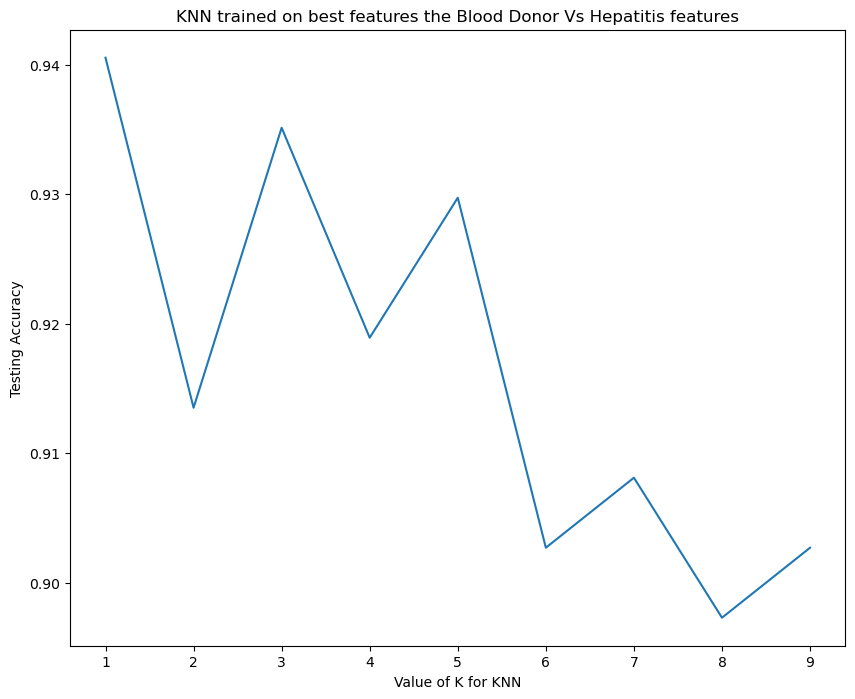

In [164]:

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("KNN trained on best features the Blood Donor Vs Hepatitis features")

In [165]:
knn_Sklearn = KNeighborsClassifier(n_neighbors= 3)
knn_Sklearn.fit(xb_train, yb_train)

KNeighborsClassifier(n_neighbors=3)

In [166]:
Y_predict_Sklearn = knn_Sklearn.predict(xb_test)
Y_predict_Sklearn

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [167]:

accuracy = metrics.accuracy_score(y_test, Y_predict_Sklearn)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, Y_predict_Sklearn)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, Y_predict_Sklearn)
print("Recall score:",recall)
f1 = metrics.f1_score(y_test, Y_predict_Sklearn)
print("F1 score:",f1)

Accuracy score: 0.9351351351351351
Precision score: 0.9473684210526315
Recall score: 0.6206896551724138
F1 score: 0.75


In [168]:
models['KNN for best features'] = {'recall':recall,'precision':precision,'accuracy':accuracy,'f1':f1}

In [169]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, Y_predict_Sklearn)  
print(cm)

[[155   1]
 [ 11  18]]


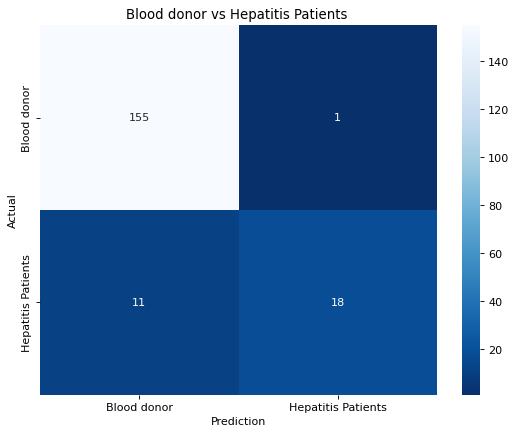

In [170]:
#Blood donor vs Hepatitis Patients 
pred_ls = prediction_clf
test_ls = y_test

conf_arr = confusion_matrix(test_ls, Y_predict_Sklearn)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

CLASSES = ['Blood donor','Hepatitis Patients']
ax = sns.heatmap(conf_arr, cmap="Blues_r", annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Blood donor vs Hepatitis Patients ')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show(ax)

#### Justification
 Class imbalance can be an issue in this dataset.
If we have an imbalanced class data, the algorithm might wrongly pick the majority class.
So this KNN ML algorithm cannot be  used  in this dataset

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [171]:
models

{'Logistic Regression All': {'recall': 0.4482758620689655,
  'precision': 0.8666666666666667,
  'accuracy': 0.9027027027027027,
  'f1': 0.5909090909090909},
 'Logistic Regression best features': {'recall': 0.4827586206896552,
  'precision': 0.8235294117647058,
  'accuracy': 0.9027027027027027,
  'f1': 0.608695652173913},
 'Decision Tree All': {'recall': 0.7241379310344828,
  'precision': 0.8076923076923077,
  'accuracy': 0.9297297297297298,
  'f1': 0.7636363636363636},
 'Decision Tree for best features': {'recall': 0.7241379310344828,
  'precision': 0.8076923076923077,
  'accuracy': 0.9297297297297298,
  'f1': 0.7636363636363636},
 'KNN for whole features': {'recall': 0.3448275862068966,
  'precision': 0.9090909090909091,
  'accuracy': 0.8918918918918919,
  'f1': 0.5000000000000001},
 'KNN for best features': {'recall': 0.6206896551724138,
  'precision': 0.9473684210526315,
  'accuracy': 0.9351351351351351,
  'f1': 0.75}}

In [172]:
models_df = pd.DataFrame(models)

In [173]:
models_df.head()

,Logistic Regression All,Logistic Regression best features,Decision Tree All,Decision Tree for best features,KNN for whole features,KNN for best features
recall,0.448276,0.482759,0.724138,0.724138,0.344828,0.620690
precision,0.866667,0.823529,0.807692,0.807692,0.909091,0.947368
accuracy,0.902703,0.902703,0.929730,0.929730,0.891892,0.935135
f1,0.590909,0.608696,0.763636,0.763636,0.500000,0.750000


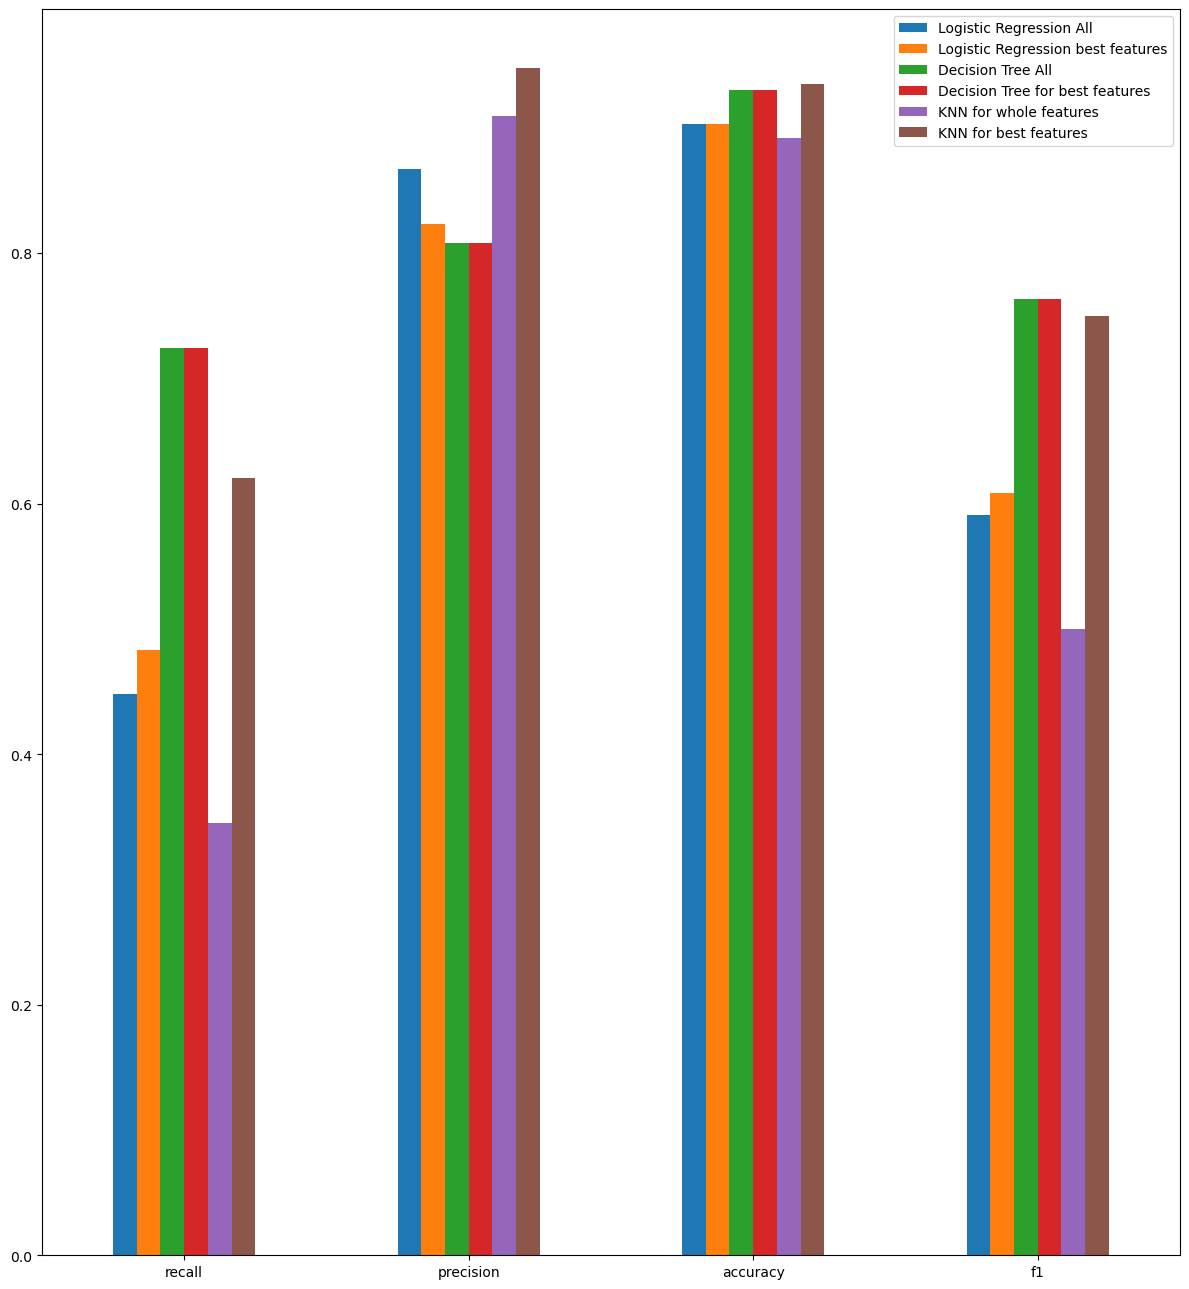

In [174]:
plt.rcParams["figure.figsize"] = (12, 13)
models_df.plot(kind='bar')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

We understand from this above statistics and recall score of each ML algorithm KNN and decision tree 
are much suitable for this dataset. 

In [175]:
##---------Type the code below this line------------------##

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

The experimental results indicated that the proposed 
framework achieved higher accuracies after Standard feature selection
than without feature selection.

Null values can be replaced with median is better than removing it

Outlier detection and replacing with median is better than removing it

Various feature algorithms used and almost all of the showed same 
result that these are more useful in predicting target feature 



> df[ ['GGT','AST','BIL','ALT','ALP'] ]






Accuary score, recall score, confusion matrix helped to evalvuvate the accuracy of the ml algorithm prediction

The proposed system has been applied on real data
of hepatitis patients. Experimental result prove that
the proposed system is effective for diagnosing the
hepatitis viruses.  We have used
only 3 ml algorithms used to predict it .
In the future, larger data set will be
considered to build the model which will
produce more unique rules so giving higher
accuracy.